In [1]:
import awkward as ak
import numpy as np
import time
import coffea
import pickle
import hist

print(coffea.__version__)
from coffea import util
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
from python.plugins import handleData

# redirector = 'root://xcache/'
redirector='root://cmsxrootd.fnal.gov/'
# files = handleData('fileset_QCD.json', redirector, year = 2018, testing = True)
# files = handleData('datasets_UL_NANOAOD.json', redirector, year = 2018, testing = True)
# events = NanoEventsFactory.from_root(redirector+'/store/data/Run2018D/JetHT/NANOAOD/UL2018_MiniAODv2_NanoAODv9-v2/80000/8A5A537C-C950-7743-9E8F-FFC5383DDBC3.root', schemaclass=NanoAODSchema).events()
# print(events.run)
import uproot
# ### uproot notation
# qcd_mc = uproot.open(list(files.values())[-1][0])
qcd_mc = uproot.open(redirector+"/store/mc/RunIISummer20UL17NanoAODv9/QCD_Pt_3200toInf_TuneCP5_13TeV_pythia8/NANOAODSIM/106X_mc2017_realistic_v9-v1/280000/B21BFDD8-B878-784C-AFB6-5CDE131F5C39.root")
uprootevents = qcd_mc['Events']
print(uprootevents.keys('ubjet'))
# # for key in
# print(uprootevents["L1PreFiringWeight_Nom"].array())
# print(len(uprootevents_data["L1PreFiringWeight_Nom"].array()))

0.7.21
[]


In [2]:
from python.plugins import *
from python.trijetProcessor import makeTrijetHists
from dask.distributed import Client


data = True
winterfell = False
casa = False
dask = True
testing= False
year="2018"
btag_str = 'None'
processor = makeTrijetHists(data = data, btag = btag_str, hem=True)
datastring = "JetHT" if processor.do_gen == False else "QCDsim"
if processor.do_gen==True and winterfell:
    filename = "QCD_flat_files.json"
elif processor.do_gen==True:
    filename = "fileset_QCD.json"
else:
    filename = "datasets_UL_NANOAOD.json"
    
if year == 2016 or year == 2017 or year == 2018:
    year_str = str(year)
elif year == "2016" or year == "2016APV" or year == "2017" or year == "2018":
    year_str = year
else:
    year_str = "All"

if testing and not data:
    fname = 'coffeaOutput/trijet/trijetHistsTest_wXSscaling_{}_pt{}_rapidity{}_{}HEMveto{}.pkl'.format(datastring, processor.ptcut, processor.ycut, processor.btag, year_str)
elif testing and data:
    fname = 'coffeaOutput/trijet/trijetHistsTest{}_pt{}_rapidity{}_{}HEMveto{}.pkl'.format(datastring, processor.ptcut, processor.ycut, processor.btag, year_str)
elif not testing and data:
    fname = 'coffeaOutput/trijet/trijetHists_{}_pt{}_rappidity{}_{}HEMveto{}.pkl'.format(datastring, processor.ptcut, processor.ycut, processor.btag, year_str)
else:
    fname = 'coffeaOutput/trijet/trijetHists_wXSscaling_{}_pt{}rapidity{}_{}HEMveto{}.pkl'.format(datastring, processor.ptcut, processor.ycut, processor.btag, year_str)

2.7.2
0.7.21
Data:  True  gen  False
mreco bins:  [0.00e+00 5.00e-01 1.00e+00 3.00e+00 5.00e+00 7.50e+00 1.00e+01 1.50e+01
 2.00e+01 3.00e+01 4.00e+01 5.00e+01 6.00e+01 7.00e+01 8.00e+01 9.00e+01
 1.00e+02 1.25e+02 1.50e+02 1.75e+02 2.00e+02 2.25e+02 2.50e+02 6.25e+02
 1.00e+03]


In [3]:
# # %%capture cap
# result = runCoffeaJob(processor, jsonFile = filename, casa=casa, winterfell = winterfell, dask = dask, year=year, testing = testing, data = not processor.do_gen)
# with open(fname, "wb") as f:
#     pickle.dump( result, f)
# # with open('trijet_'+datastring+year_str+processor.btag+'output.txt', 'w') as f:
# #     f.write(cap)

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
# print(result)
os_path = 'plots/selectionStudies/trijet/'
checkdir(os_path)

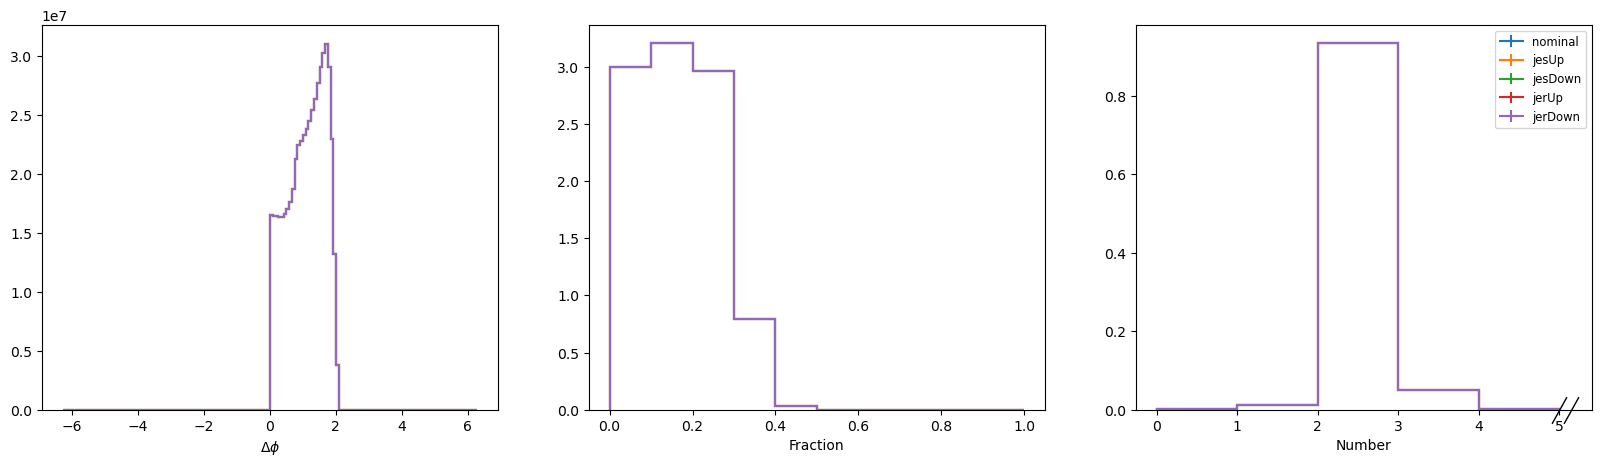

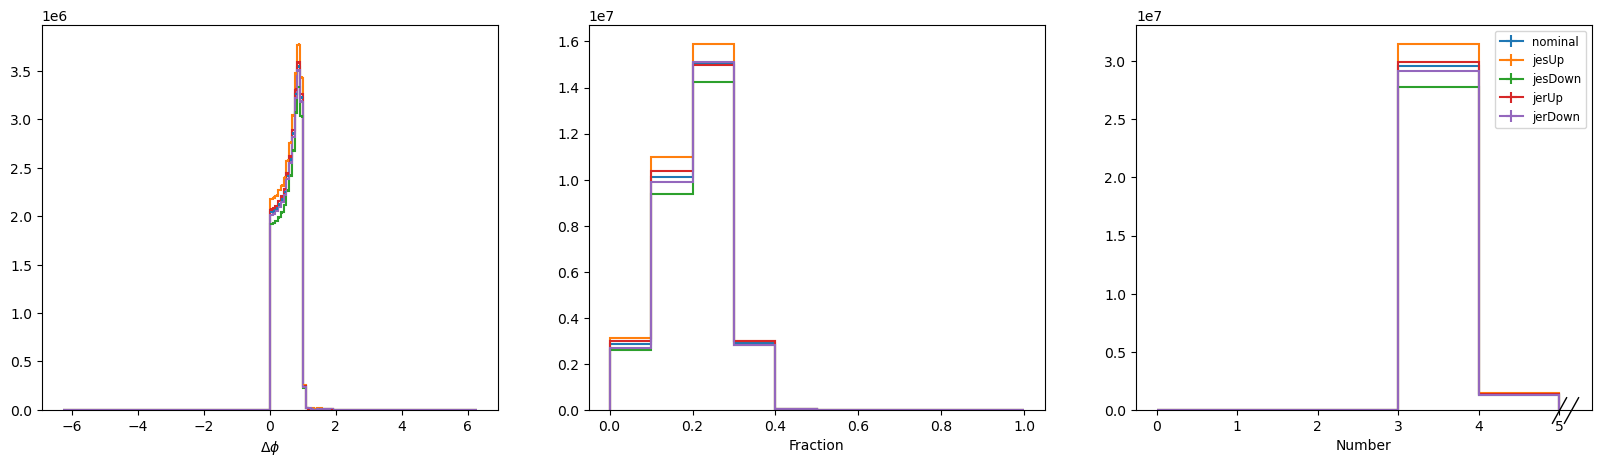

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)
if not data:
    fig, axs = plt.subplots(1, 3)
    result['dphimin_gen'][{'dataset':sum}].plot1d(ax = axs[0])
    result['asymm_gen'][{'dataset':sum}].plot1d(ax=axs[1], density=True)
    result['njet_gen'][{'dataset':sum}].plot1d(ax=axs[2], density=True)
    plt.legend()

fig, axs = plt.subplots(1, 3)
result['dphimin_reco'][{'dataset':sum}].plot1d(ax = axs[0])
result['asymm_reco'][{'dataset':sum}].plot1d(ax=axs[1])
result['njet_reco'][{'dataset':sum}].plot1d(ax=axs[2])
plt.legend()

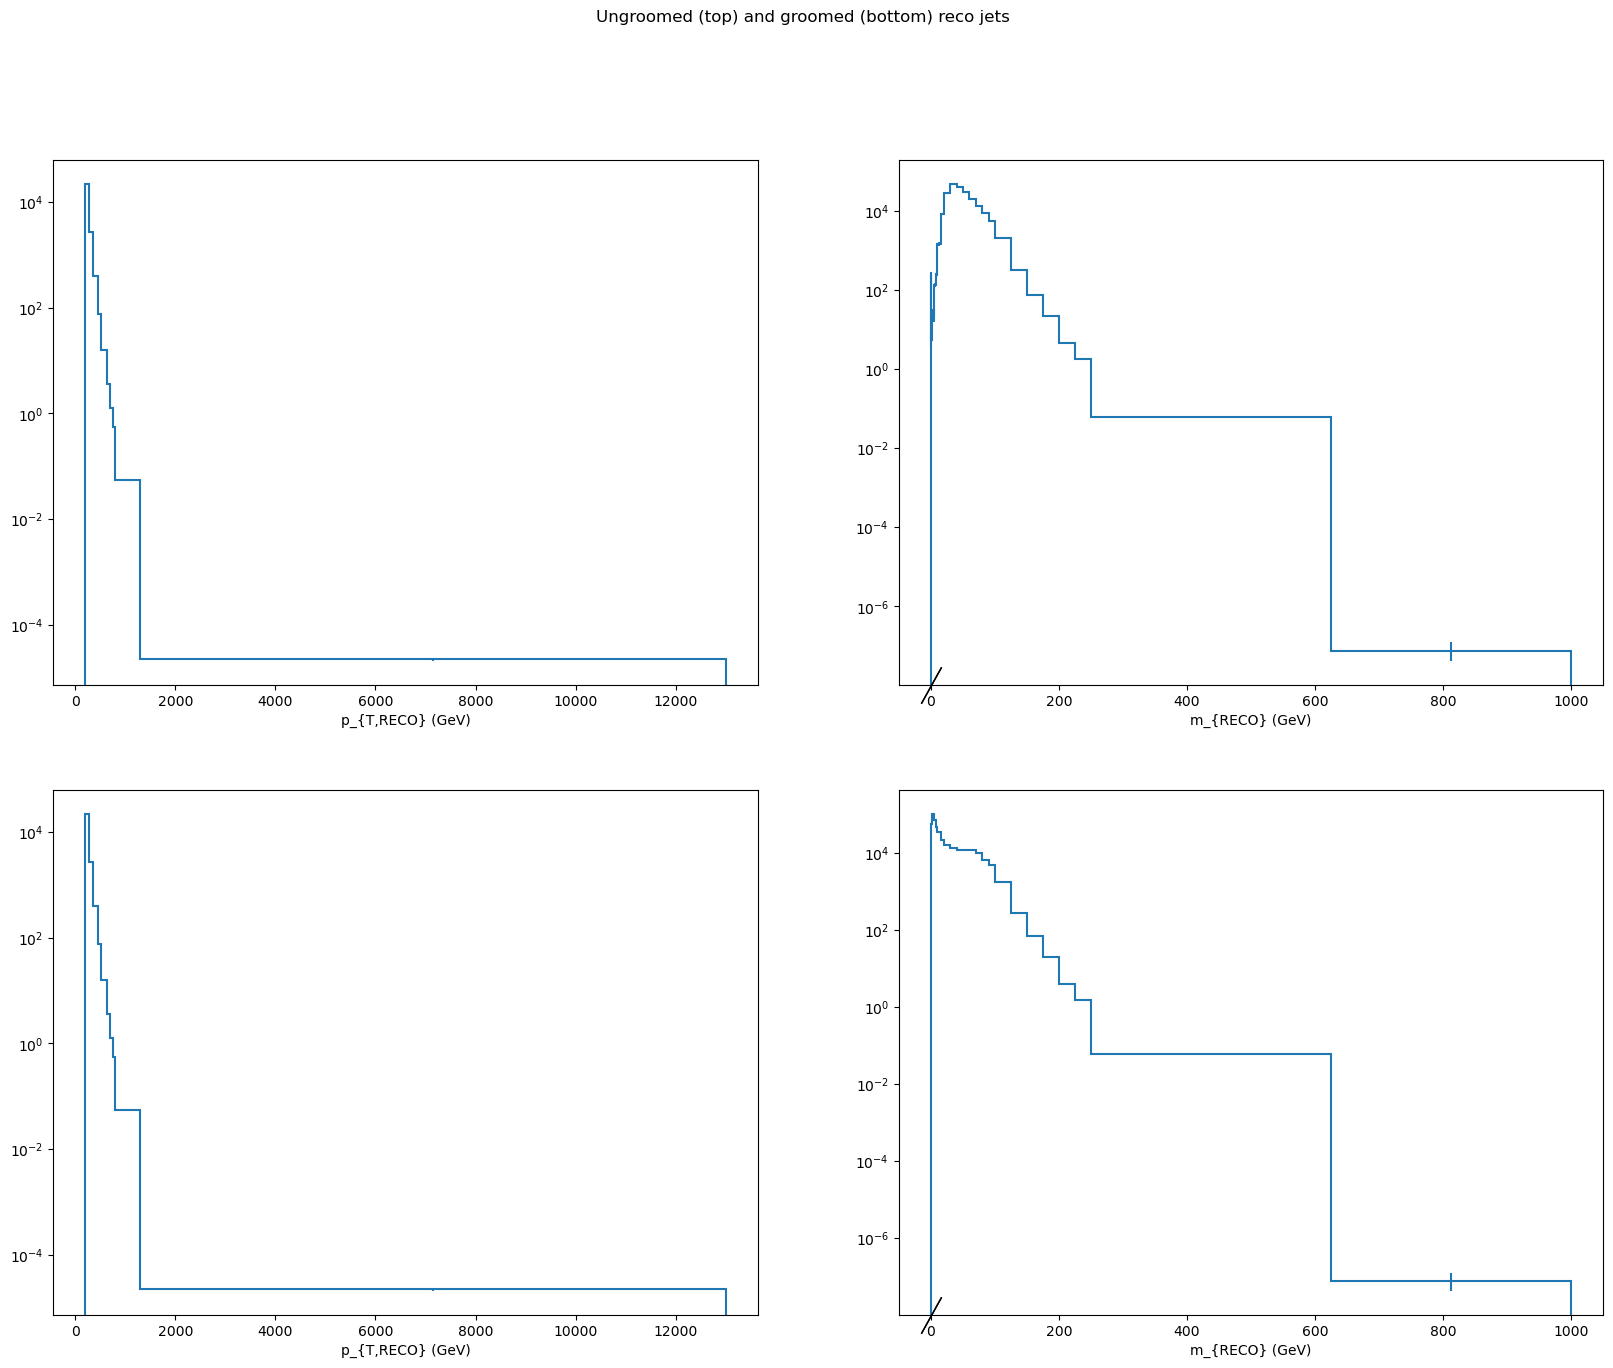

In [26]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[0,0], binwnorm=True)
result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco').plot1d(ax=axs[0,1], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0], binwnorm=True)
result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1], binwnorm=True)
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[0,1].set_yscale('log')
plt.savefig(os_path+"/test_pt_m_gen_u_g.png")

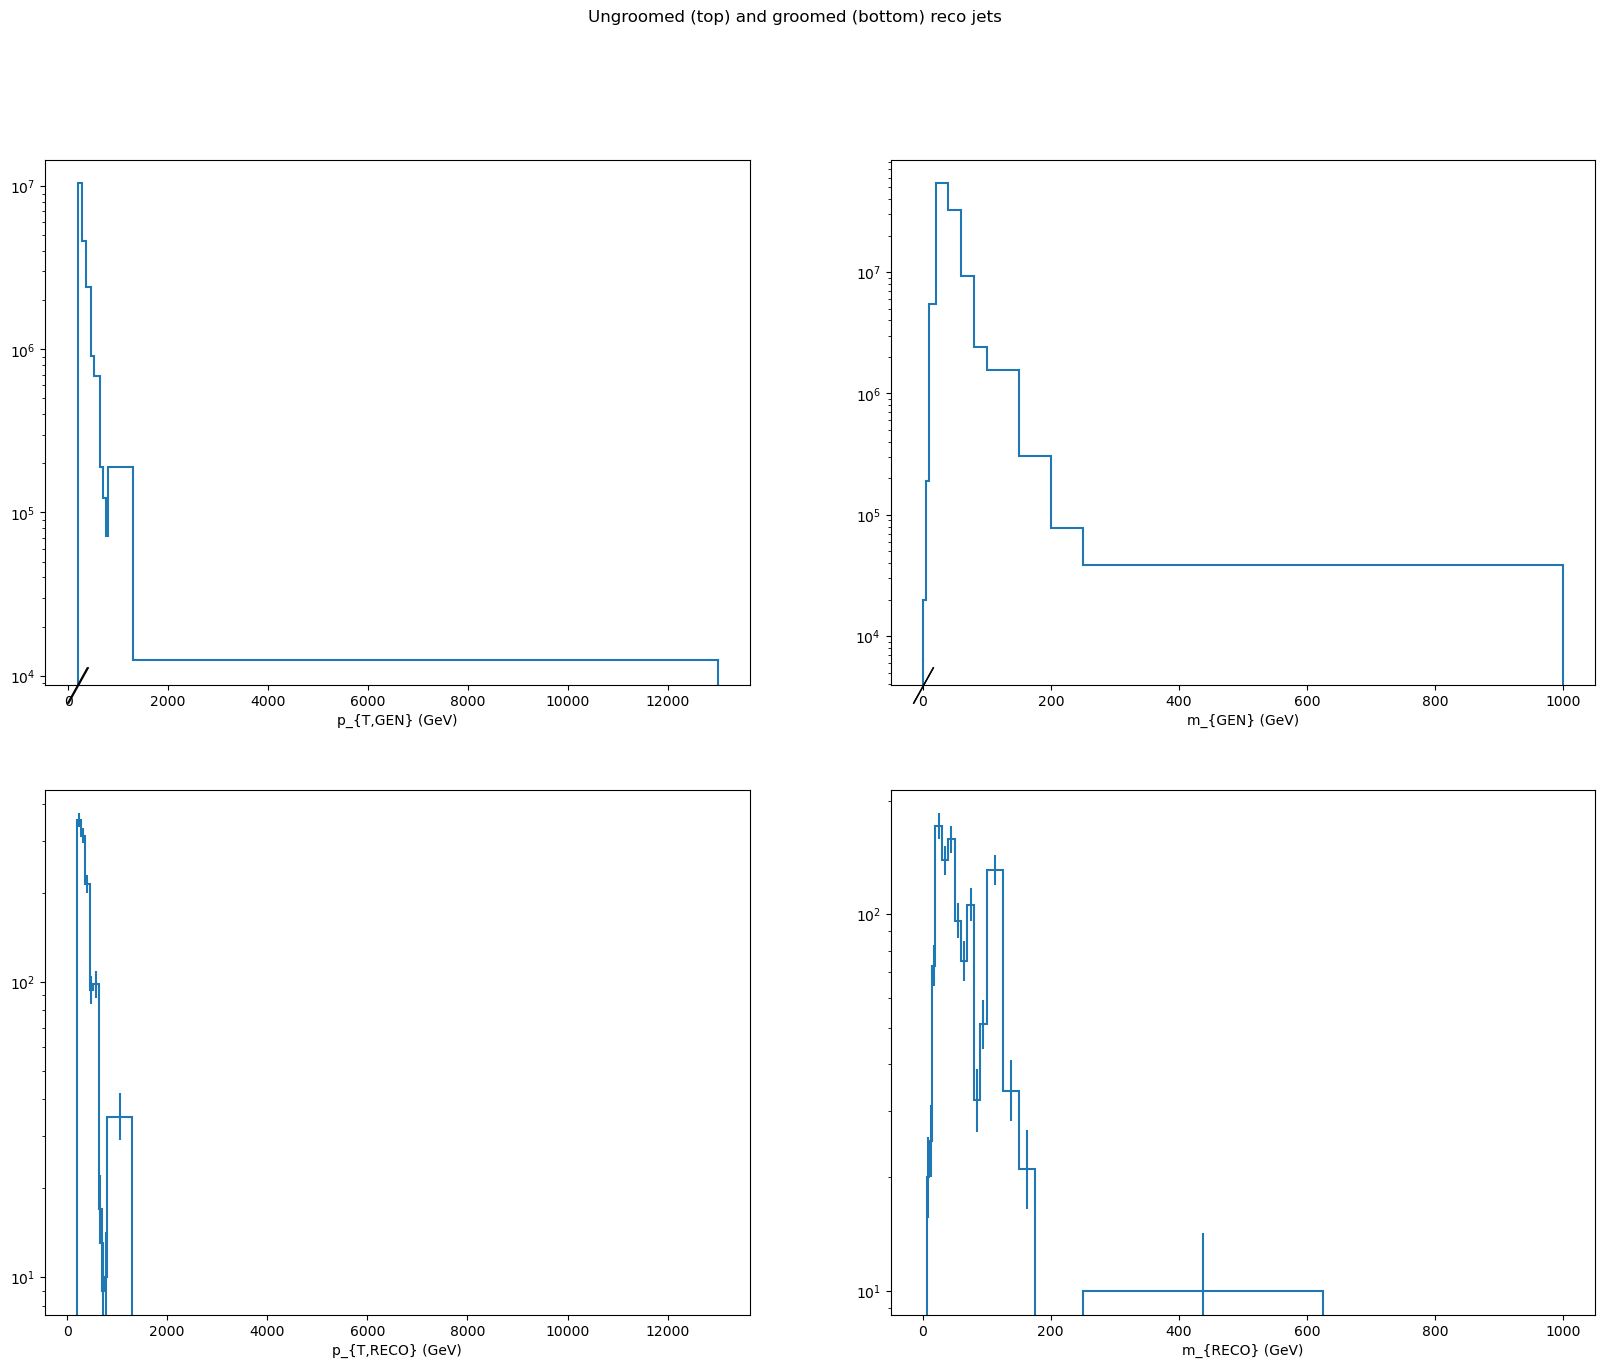

In [27]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(2, 2)
fig.suptitle('Ungroomed (top) and groomed (bottom) reco jets')
result['misses'][{'dataset':sum}].project('ptgen').plot1d(ax=axs[0,0])
result['misses'][{'dataset':sum}].project('mgen').plot1d(ax=axs[0,1])
result['fakes'][{'dataset':sum}].project('ptreco').plot1d(ax=axs[1,0])
result['fakes'][{'dataset':sum}].project('mreco').plot1d(ax=axs[1,1])
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[1,1].set_yscale('log')
axs[0,1].set_yscale('log')

### Plotting Response Matrices

['dataset', 'syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
          ┌──────────────────────────────────────────────────────────────────┐
nominal 0 │                                                                  │
  jesUp 0 │                                                                  │
jesDown 0 │                                                                  │
  jerUp 0 │                                                                  │
jerDown 0 │                                                                  │
          └──────────────────────────────────────────────────────────────────┘


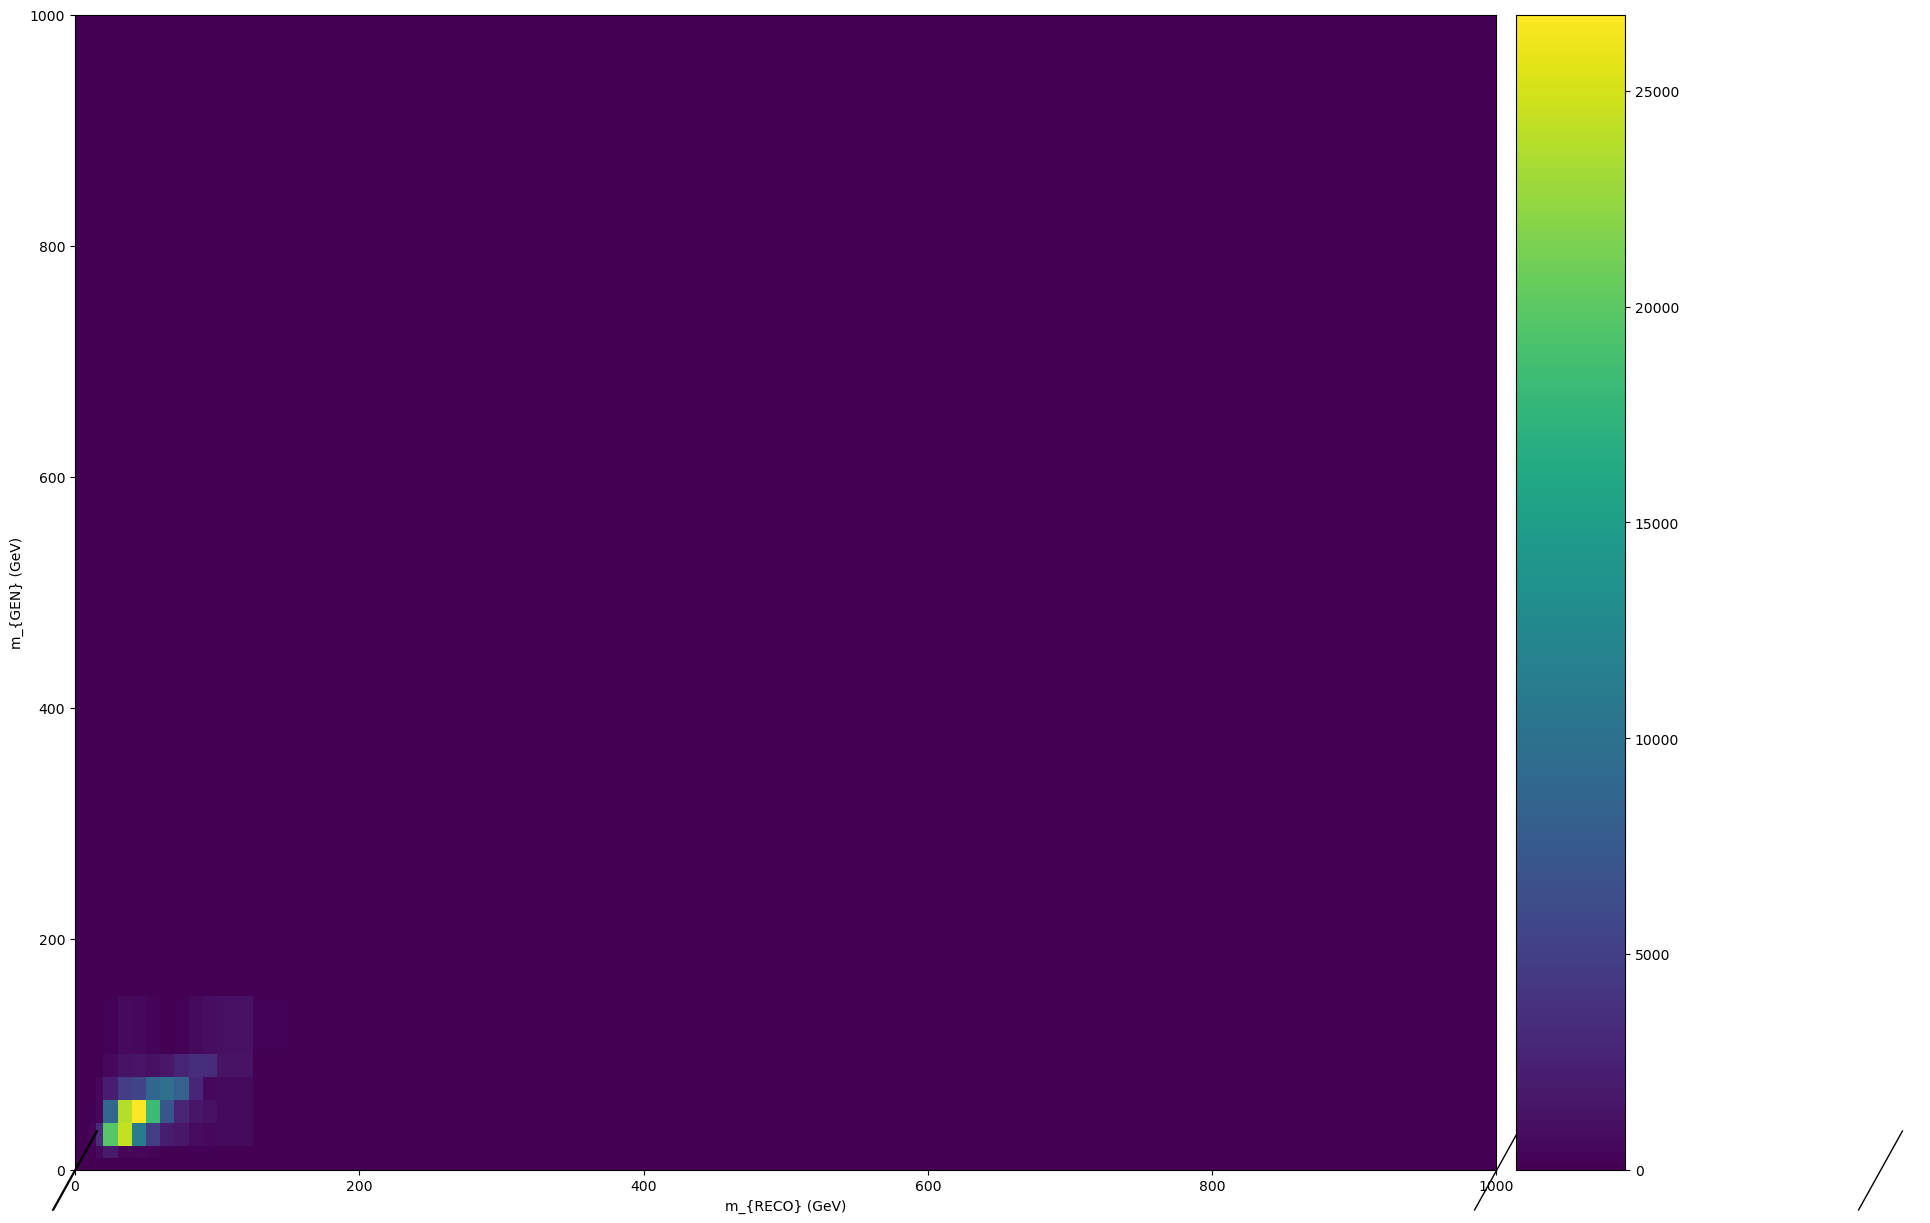

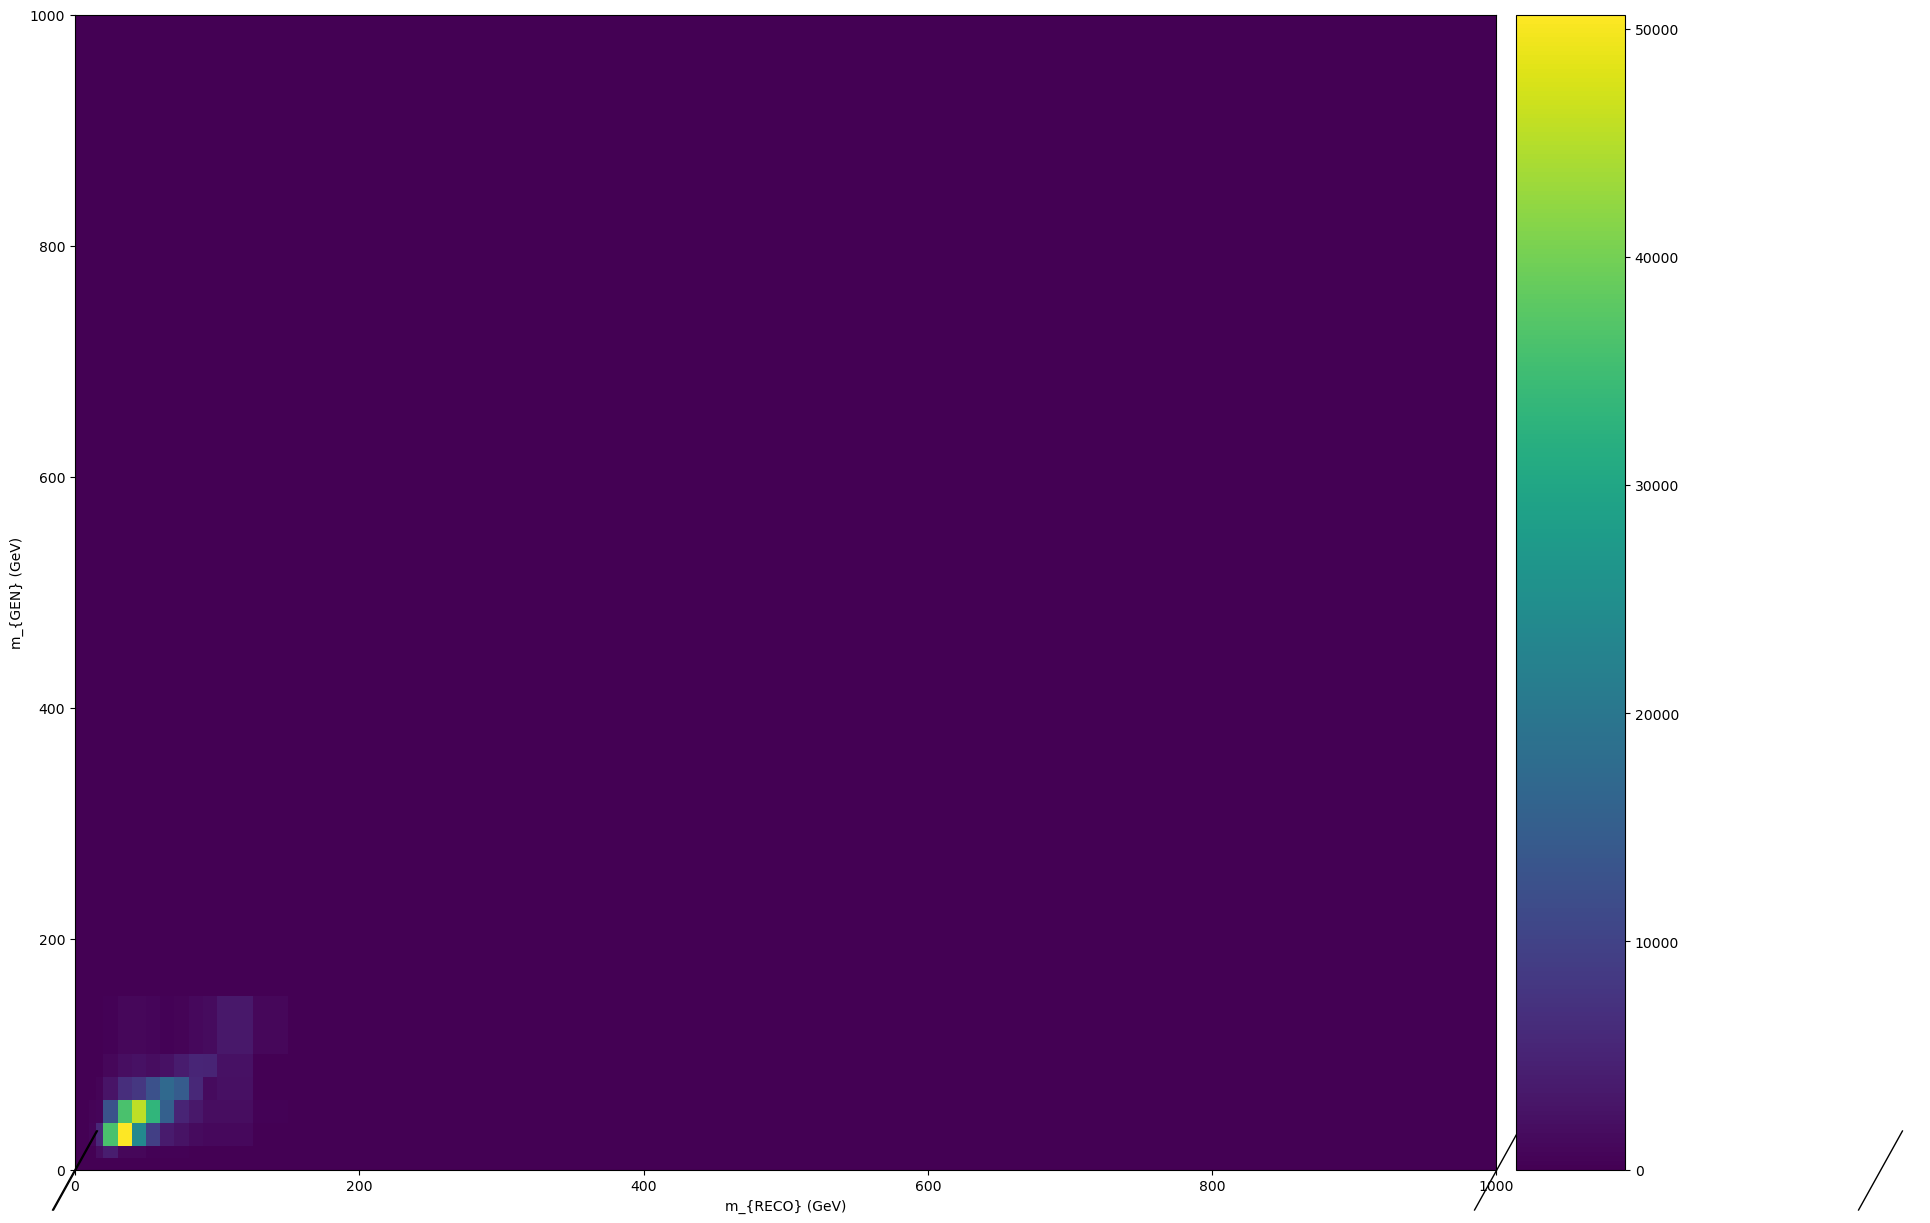

(10, 24, 10, 12)
Max ungroomed value np  133820.36315959904
Location of max cal in 4d array : []
121391.4130720735
Location of max cal in 2d array : []
121391.4130720735
Location of max cal in 2d array : []
1084
121391.4130720735
4
[[240.     0.75 240.     0.5 ]
 [240.     0.75 240.     3.  ]
 [240.     0.75 240.     7.5 ]
 [240.     0.75 240.    15.  ]
 [240.     0.75 240.    30.  ]
 [240.     0.75 240.    50.  ]
 [240.     0.75 240.    70.  ]
 [240.     0.75 240.    90.  ]
 [240.     0.75 240.   125.  ]
 [240.     0.75 240.   175.  ]]
[240. 240. 240. 240. 240. 240. 240. 240. 240. 240.]
[  0.5   3.    7.5  15.   30.   50.   70.   90.  125.  175. ]


In [28]:
print([ax.name for ax in result['response_matrix_u'].axes])
data = False
if not data:
    response_matrix_u_values = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").values()
    response_matrix_g_values = result['response_matrix_g'].project("ptreco", "mreco", "ptgen", "mgen").values()
    print(result['response_matrix_u'][{"ptreco":1, "ptgen":2,"mreco":5, "mgen":10, "dataset":sum}])
    response_matrix_np_vals_u, ptreco_edges, mreco_edges, ptgen_edges, mgen_edges = result['response_matrix_u'].project("ptreco", "mreco", "ptgen", "mgen").to_numpy()
    result['response_matrix_u'][{"ptreco":0, "ptgen":0,"dataset":sum,"syst":"nominal"}].plot2d()
    plt.show()
    result['response_matrix_u'][{"ptreco":sum, "ptgen":sum,"dataset":sum, "syst":"nominal"}].plot2d()
    plt.show()
    nptreco,nmassreco,nptgen,nmassgen = response_matrix_u_values.shape
    print(response_matrix_u_values.shape)
    response_matrix_g_final = response_matrix_g_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) )
    response_matrix_u_final = response_matrix_u_values.reshape( (nptreco)*(nmassreco), (nptgen)*(nmassgen) ) 
    print("Max ungroomed value np ", np.max(response_matrix_u_final))
    print("Location of max cal in 4d array :", np.argwhere(response_matrix_np_vals_u==49) )
    print(response_matrix_np_vals_u[0,9,0,4])
    print("Location of max cal in 2d array :", np.argwhere(response_matrix_u_final==49) )
    print(response_matrix_u_final[9,4])
    print("Location of max cal in 2d array :", np.argwhere(response_matrix_u_final.flatten()==49) )
    print(9*nmassgen*nptgen+4)
    print(response_matrix_u_final.flatten()[9*nmassgen*nptgen+4])
    ptreco_centers = (ptreco_edges[:-1]+ptreco_edges[1:])/2
    mreco_centers = (mreco_edges[:-1]+mreco_edges[1:])/2
    ptgen_centers = (ptgen_edges[:-1]+ptgen_edges[1:])/2
    mgen_centers = (mgen_edges[:-1]+mgen_edges[1:])/2
    response_matrix_bins = np.ones(np.append(response_matrix_u_values.shape,4))
    response_matrix_ptreco_bins = np.ones_like(response_matrix_u_values)
    print(response_matrix_ptreco_bins.ndim)
    response_matrix_mreco_bins = np.ones_like(response_matrix_u_values)
    response_matrix_ptgen_bins = np.ones_like(response_matrix_u_values)
    response_matrix_mgen_bins = np.ones_like(response_matrix_u_values)
    for ipt in np.arange(len(ptreco_centers)):
        for im in np.arange(len(mreco_centers)):
            for jpt in np.arange(len(ptgen_centers)):
                for jm in np.arange(len(mgen_centers)):
                    response_matrix_ptreco_bins[ipt,im,jpt,jm] = ptreco_centers[ipt]
                    response_matrix_mreco_bins[ipt][im][jpt][jm] = mreco_centers[im]
                    response_matrix_ptgen_bins[ipt][im][jpt][jm] = ptgen_centers[jpt]
                    response_matrix_mgen_bins[ipt][im][jpt][jm] = mgen_centers[jm]
                    response_matrix_bins[ipt][im][jpt][jm] = [ptreco_centers[ipt], mreco_centers[im], ptgen_centers[jpt], mgen_centers[jm]]
    response_matrix_ptreco_bins = response_matrix_ptreco_bins.reshape((nptreco)*(nmassreco), (nptgen)*(nmassgen))
    response_matrix_mgen_bins = response_matrix_mgen_bins.reshape((nptreco)*(nmassreco), (nptgen)*(nmassgen))
    response_matrix_bins = response_matrix_bins.reshape((nptreco)*(nmassreco), (nptgen)*(nmassgen), 4)
    print(response_matrix_bins[1][:10])
    print(response_matrix_ptreco_bins[1][:10])
    print(response_matrix_mgen_bins[1][:10])

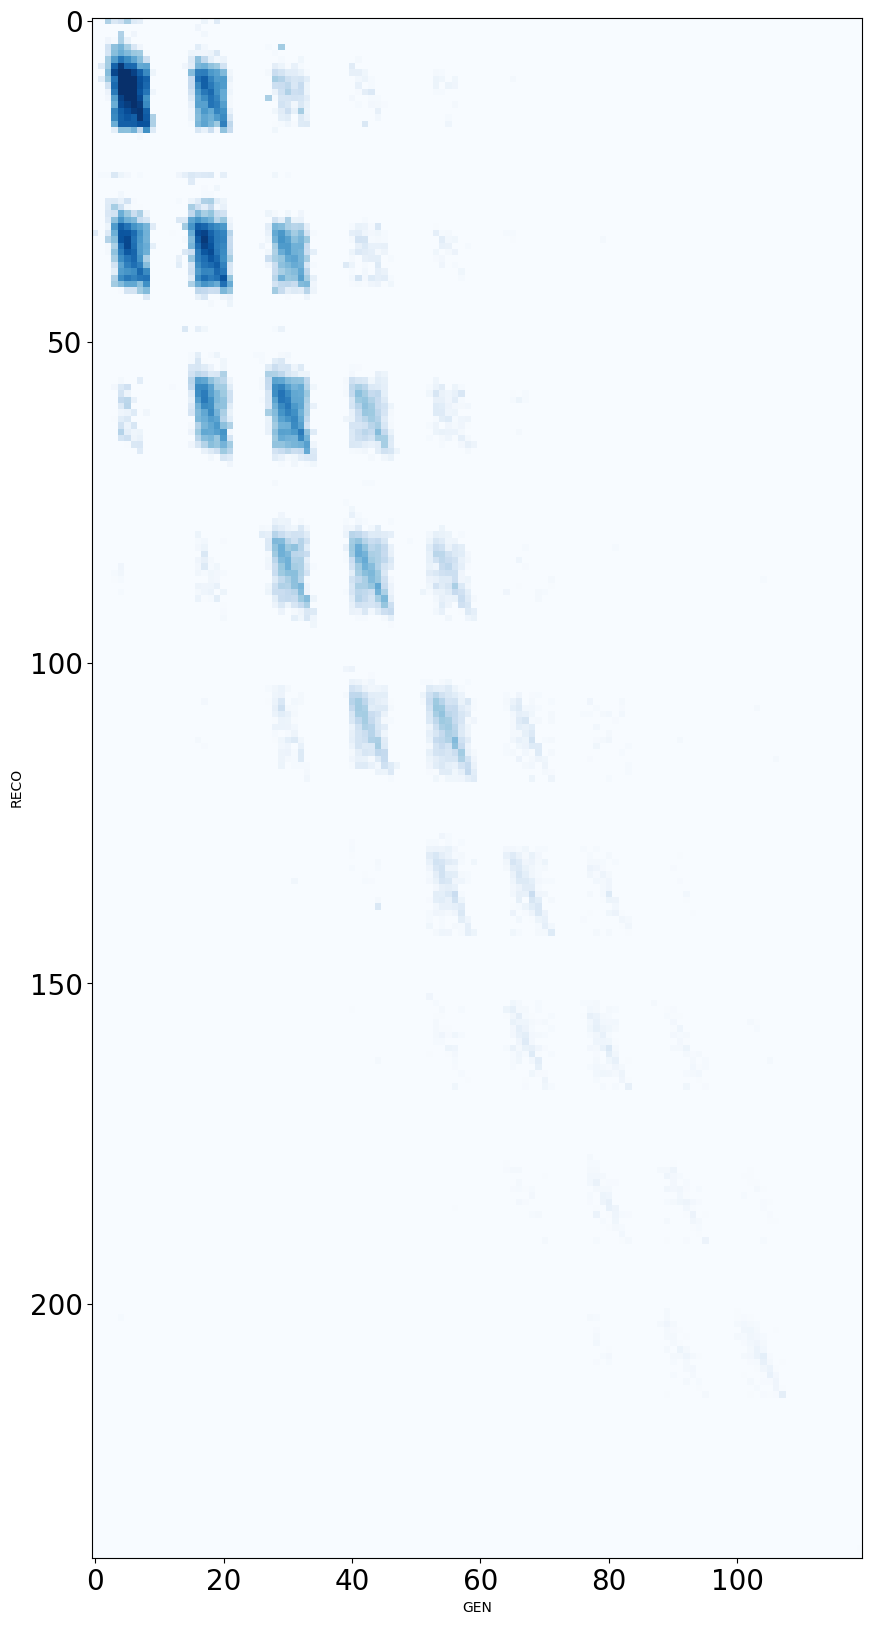

In [29]:
plt.figure(figsize = (20,20))
plt.imshow( np.log(response_matrix_u_final+1), vmax=10, aspect="equal", cmap="Blues" )
plt.xlabel("GEN", fontsize=10)
plt.ylabel("RECO", fontsize=10)
plt.tick_params(labelsize=20)

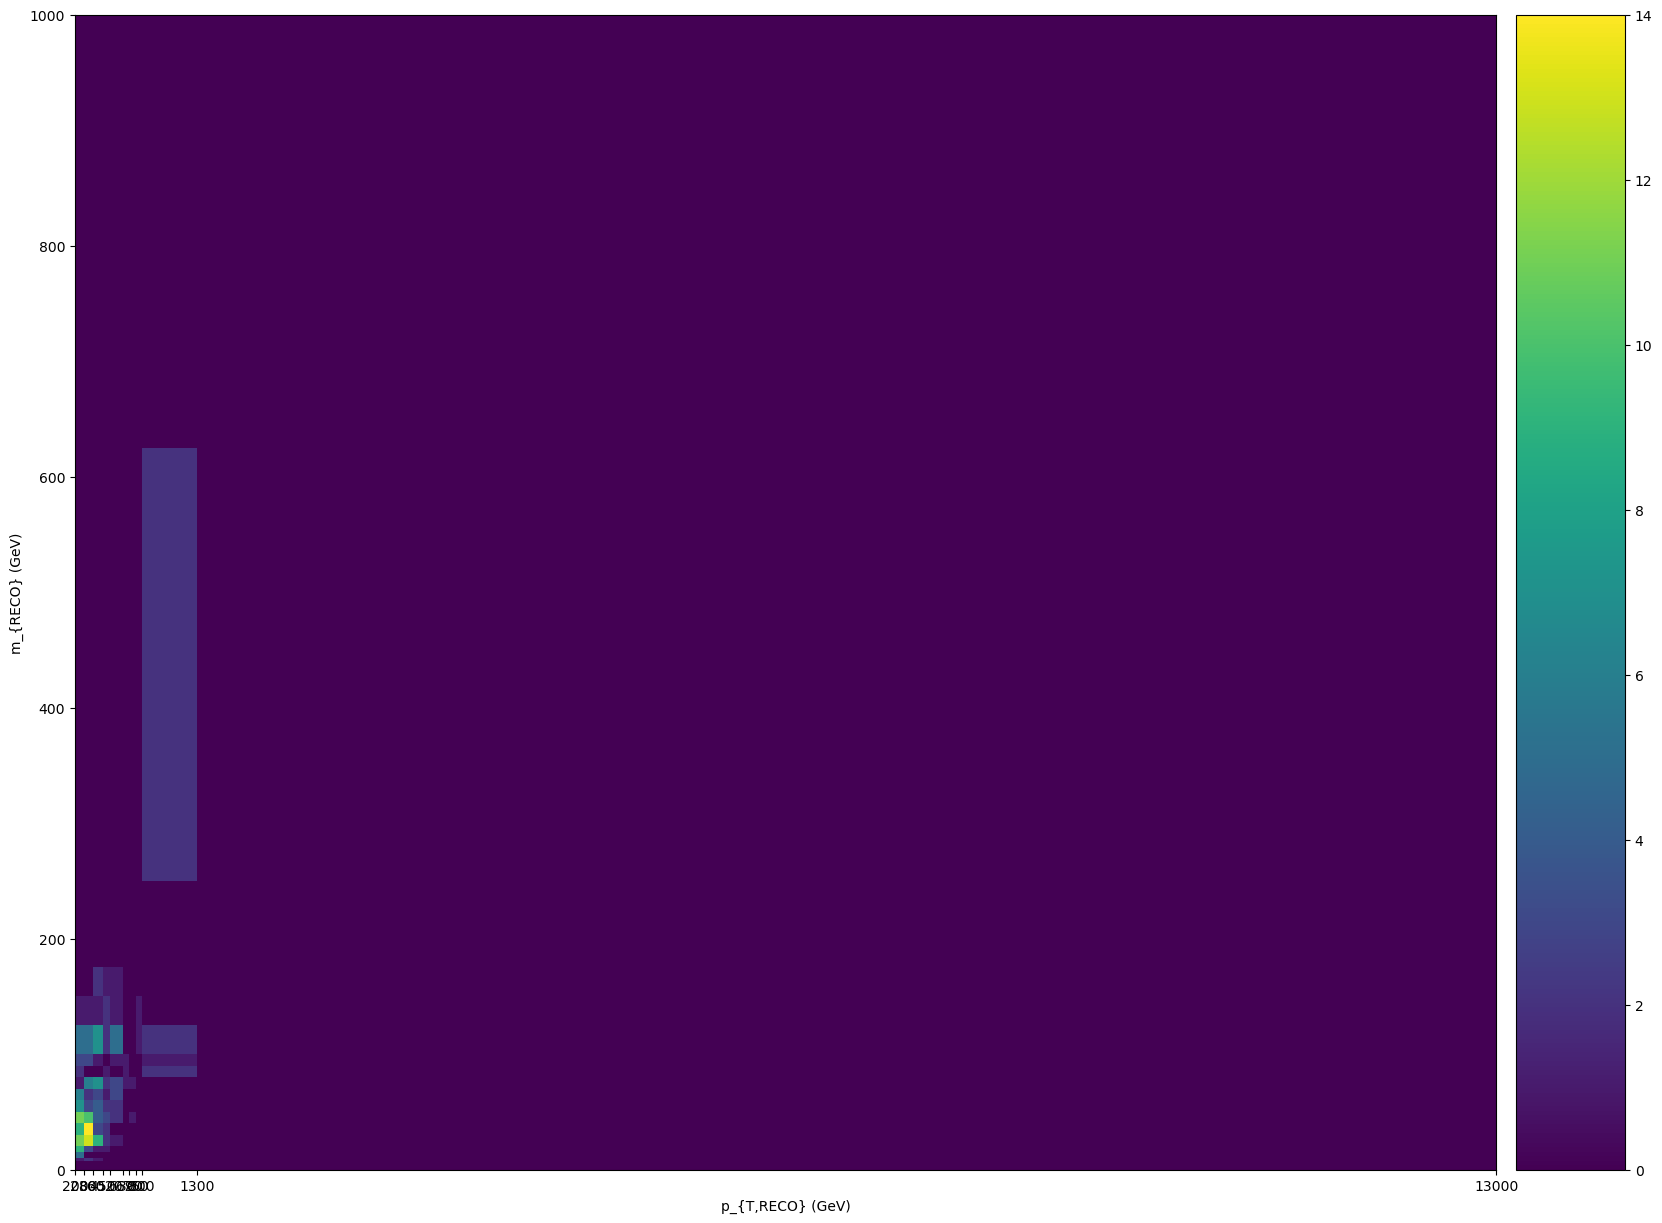

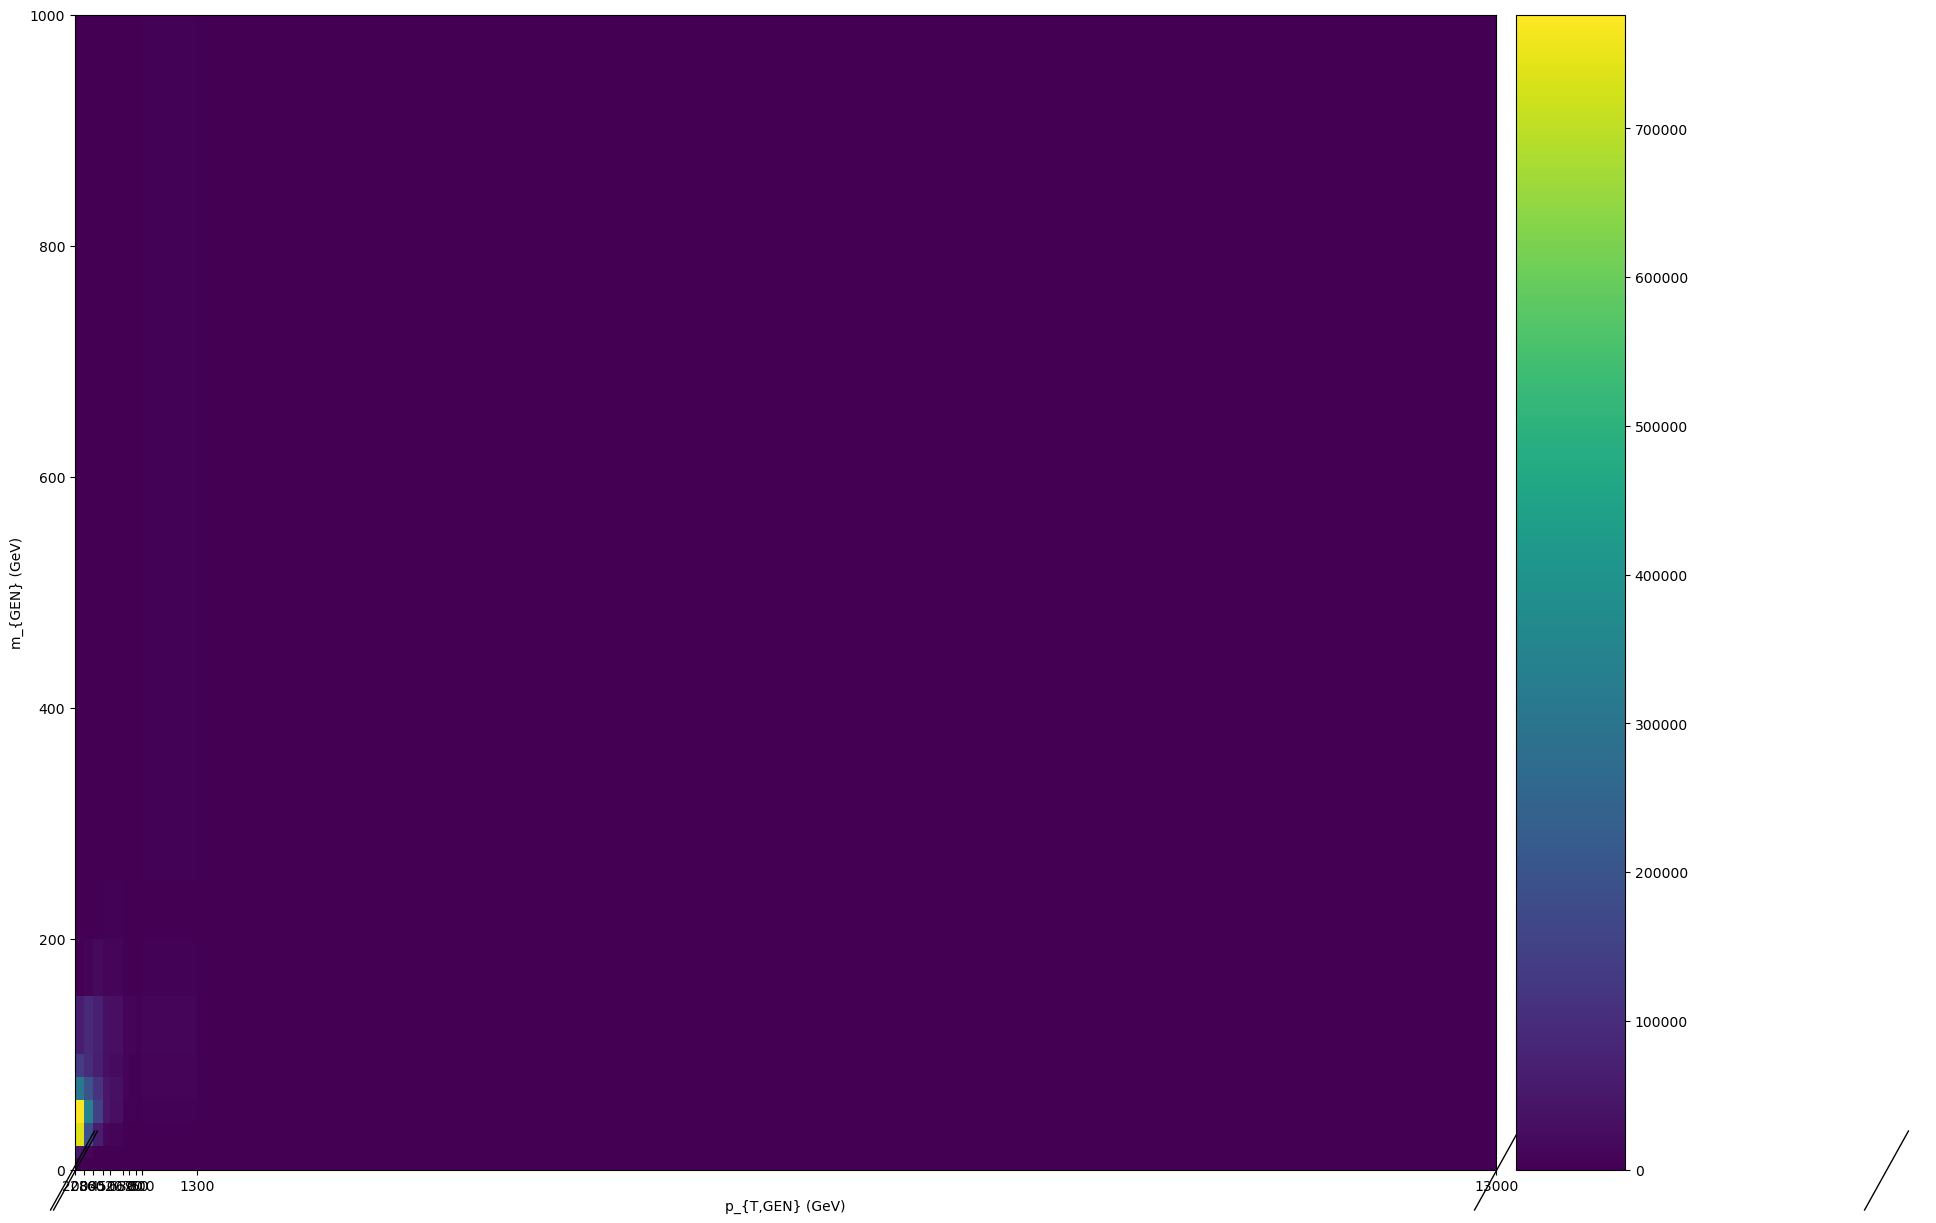

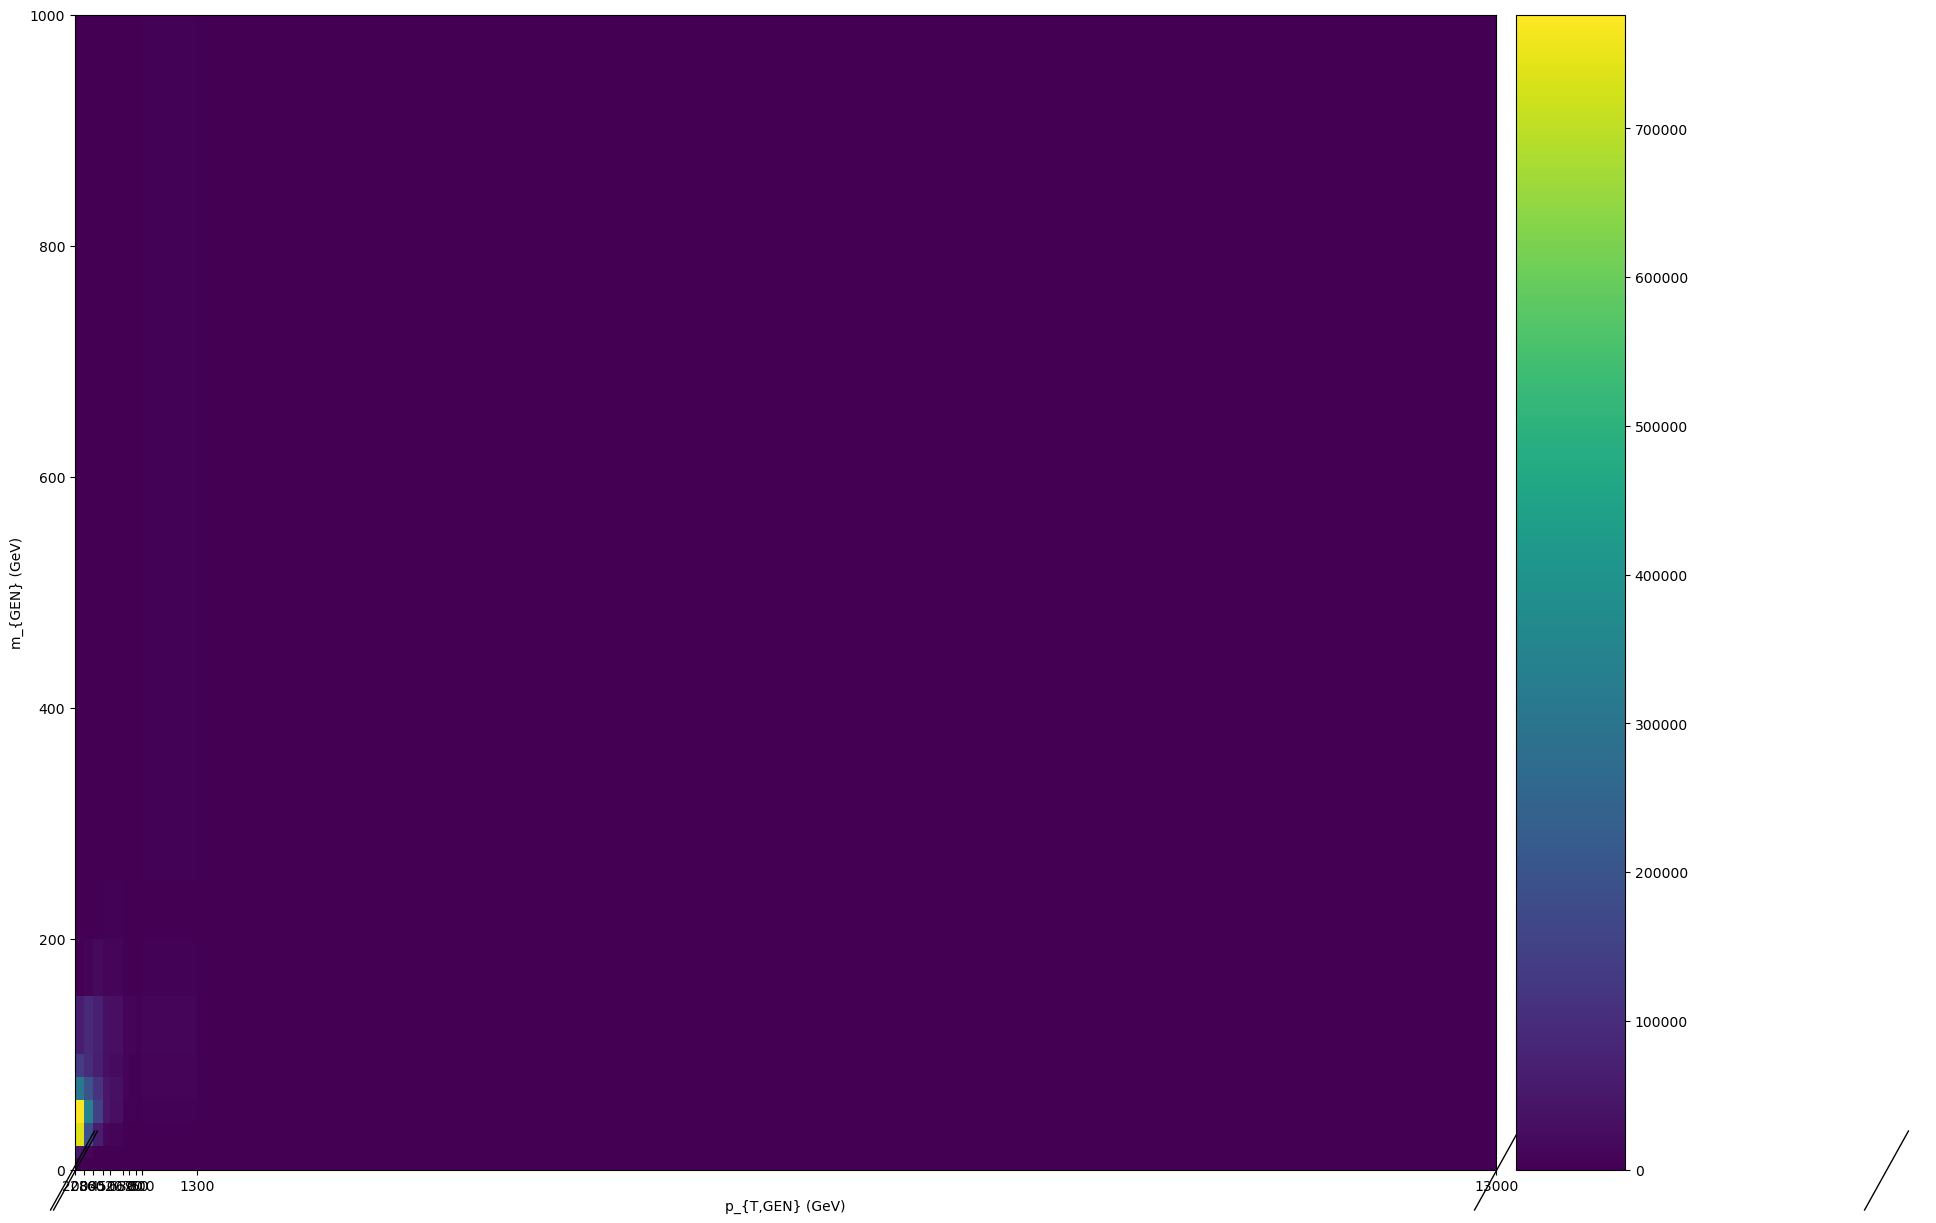

In [30]:
result['fakes'][{"dataset":sum, "syst":"nominal"}].plot2d()
plt.show()
result['misses'][{"dataset":sum, "syst":"nominal"}].plot2d()
plt.show()
result['misses'][{"dataset":sum, "syst":"nominal"}].plot2d()
plt.show()

In [31]:
nbins_ptreco = len(result['response_matrix_u'].project("ptreco").values())
nbins_mreco = len(result['response_matrix_u'].project("mreco").values())
pt_reco_bins, pt_reco_edges = result['response_matrix_u'].project("ptreco").to_numpy()
pt_gen_bins, pt_gen_edges = result['response_matrix_u'].project("ptgen").to_numpy()
print("Pt reco bins and edges: ", pt_reco_bins, pt_reco_edges)
print("Pt gen bins and edges: ", pt_gen_bins, pt_gen_edges)
print(len(pt_gen_edges), nbins_ptreco)
m_reco_bins, m_reco_edges = result['response_matrix_u'].project("mreco").to_numpy()
m_gen_bins, m_gen_edges = result['response_matrix_u'].project("mgen").to_numpy()
print("M reco bins and edges: ", m_reco_bins, m_reco_edges)
print("M gen bins and edges: ", m_gen_bins, m_gen_edges)

Pt reco bins and edges:  [1.78954195e+06 2.21298318e+05 3.61242878e+04 5.33534733e+03
 1.75592624e+03 2.14027498e+02 7.39770742e+01 2.77409387e+01
 2.74907387e+01 2.58212250e-01] [  200.   280.   360.   450.   520.   630.   690.   750.   800.  1300.
 13000.]
Pt gen bins and edges:  [1.23559960e+06 1.80824522e+05 3.08915391e+04 4.44058907e+03
 1.49755165e+03 1.74995161e+02 6.27589600e+01 2.51983897e+01
 2.16529014e+01 1.98549058e-01] [  200.   280.   360.   450.   520.   630.   690.   750.   800.  1300.
 13000.]
11 10
M reco bins and edges:  [1.21605728e+02 2.75199547e+00 4.65302930e+01 4.47138582e+01
 3.29553644e+02 6.16667753e+02 7.24600087e+03 4.23551448e+04
 2.86098512e+05 4.84133945e+05 4.09559067e+05 2.90079662e+05
 1.93759455e+05 1.33946917e+05 8.57792298e+04 5.64793322e+04
 5.24444282e+04 7.99071635e+03 1.89569116e+03 5.40226501e+02
 1.15322290e+02 4.60124058e+01 2.31680896e+01 2.79160400e-05] [0.00e+00 5.00e-01 1.00e+00 3.00e+00 5.00e+00 7.50e+00 1.00e+01 1.50e+01
 2.00e+01 3.0

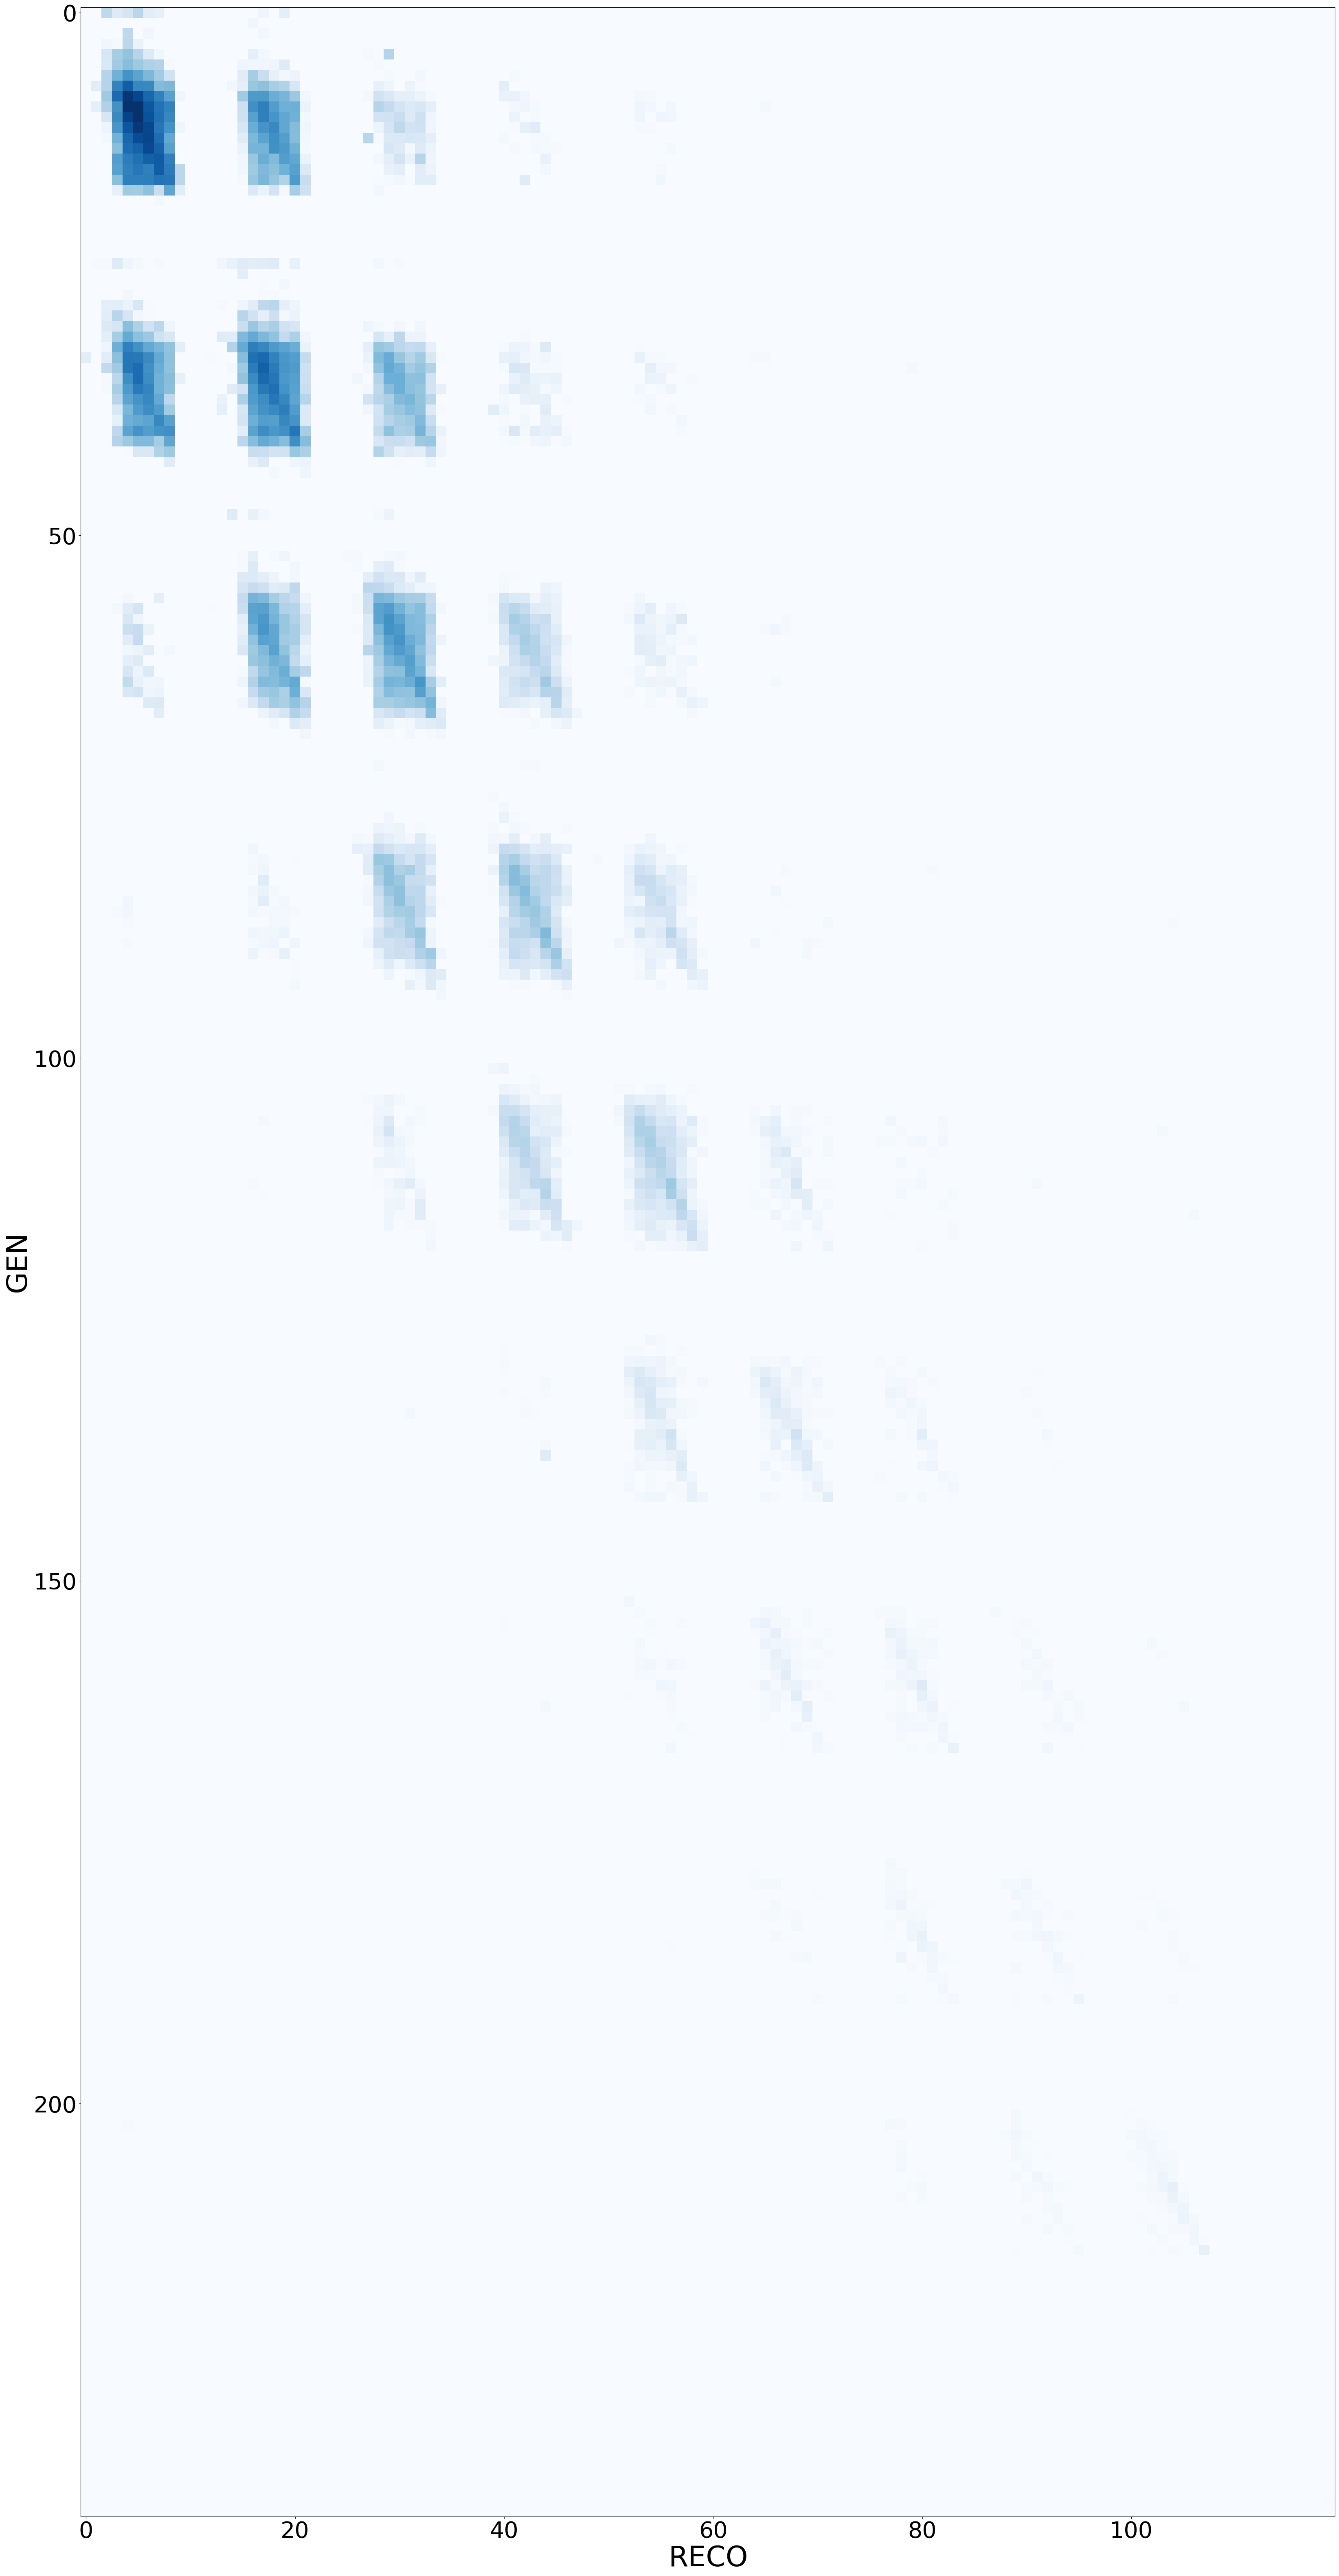

In [32]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( np.log(response_matrix_u_final+1), aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

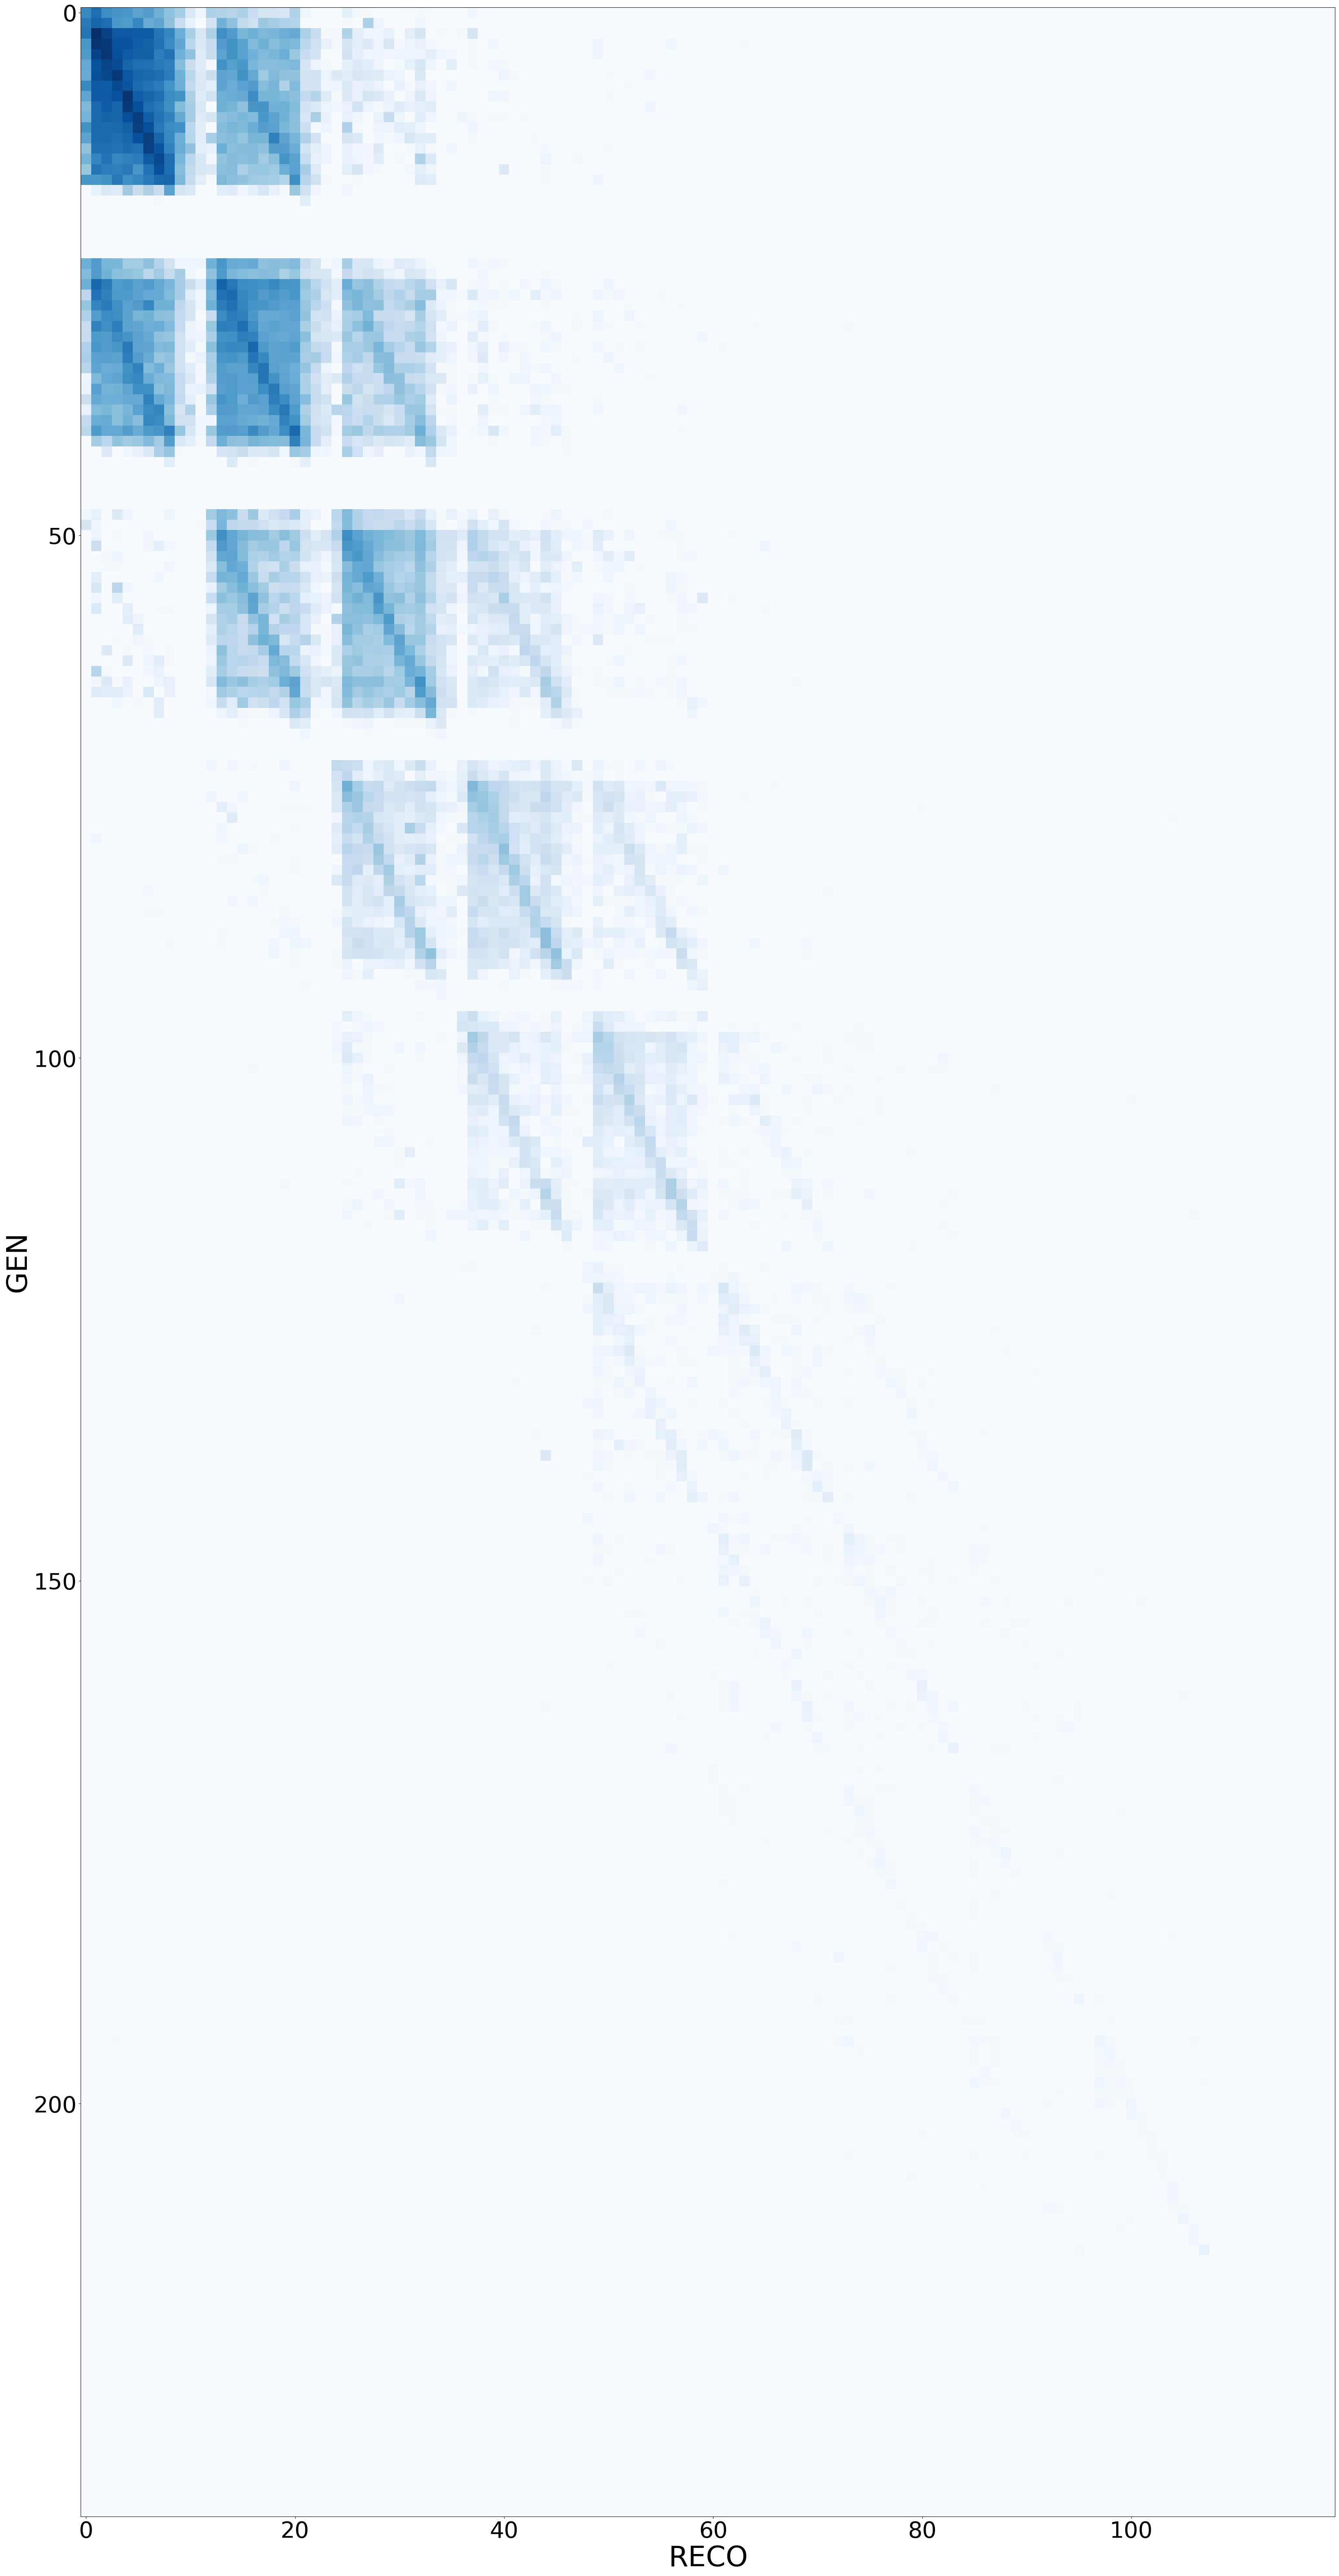

In [33]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( np.log(response_matrix_g_final+1), aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

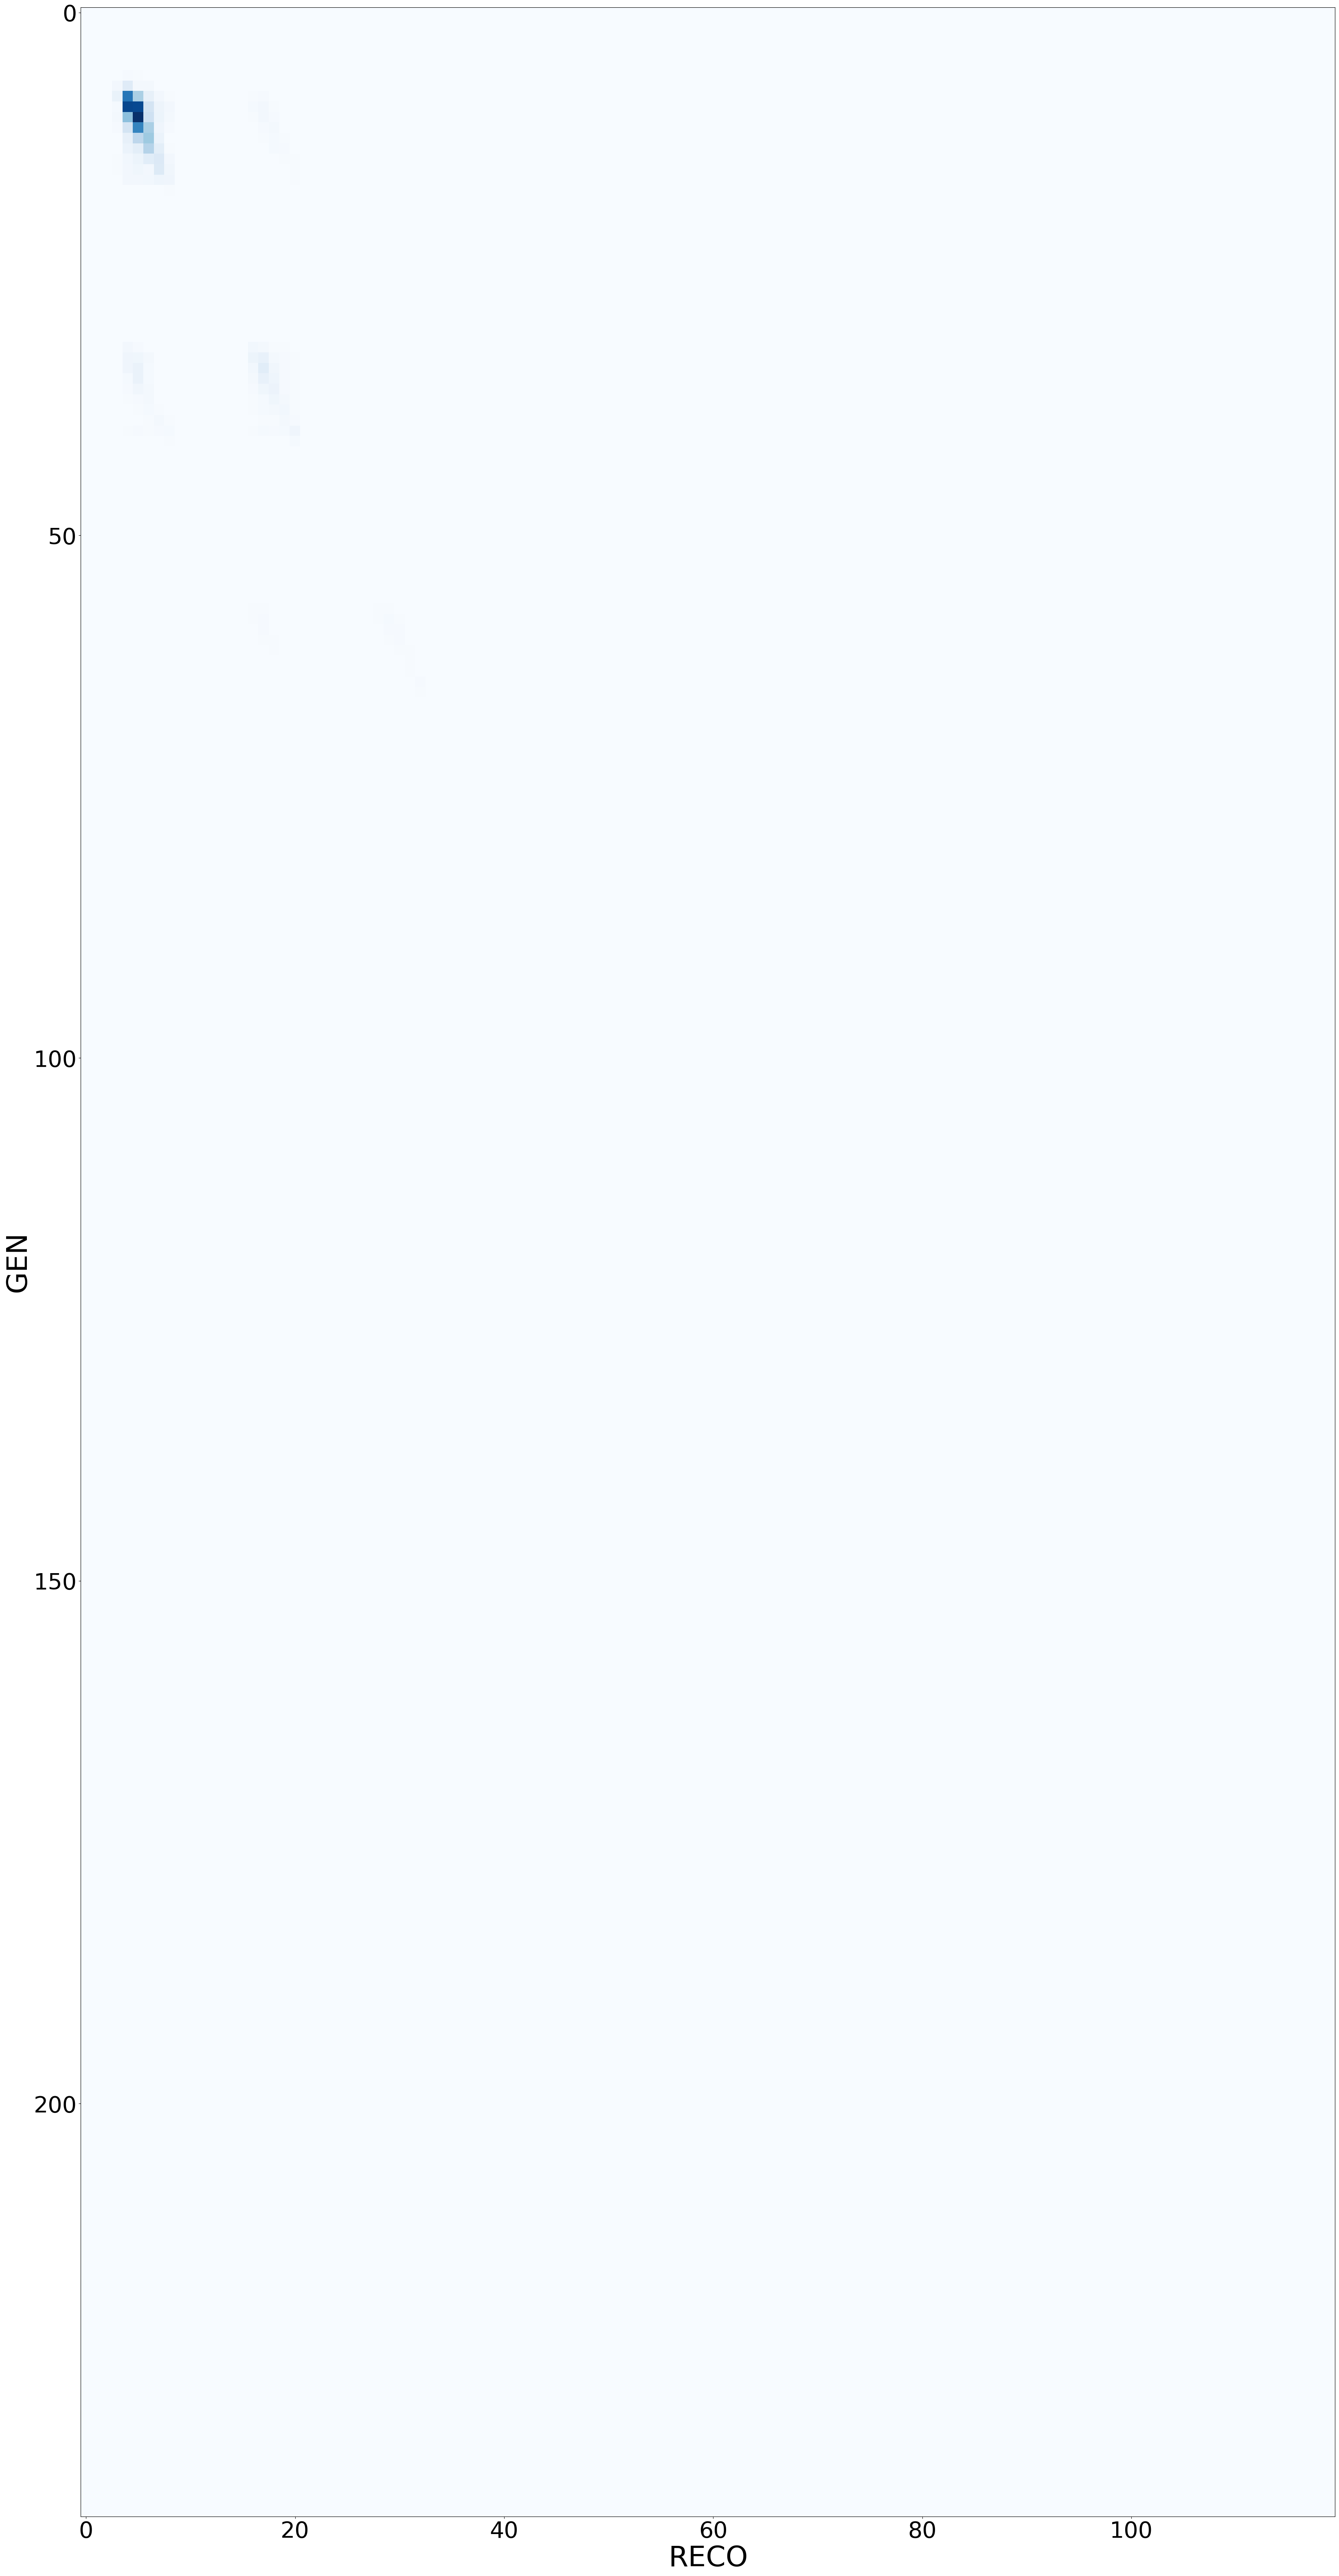

In [34]:
if not data:
    plt.figure(figsize = (40,80))
    plt.imshow( response_matrix_u_final, aspect="equal", cmap="Blues" )
    plt.xlabel("RECO", fontsize=50)
    plt.ylabel("GEN", fontsize=50)
    plt.tick_params(labelsize=40)

dict_keys(['alljet_ptreco_mreco', 'btag_eta', 'njet_gen', 'dphimin_gen', 'asymm_gen', 'njet_reco', 'dphimin_reco', 'asymm_reco', 'jet_dr_reco_gen', 'jet_mass_reco_over_gen', 'jet_pt_reco', 'jet_pt_gen', 'jet_pt_reco_over_gen', 'jet_eta_reco', 'jet_eta_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_dphi_reco', 'jet_ptasymm_reco', 'jet_dr_gen_subjet', 'jet_dr_reco_to_gen_subjet', 'jet_sd_mass_reco', 'jet_sd_mass_gen', 'misses_g', 'fakes_g', 'misses', 'fakes', 'jet_pt_mass_reco_u', 'jet_pt_mass_reco_g', 'jet_pt_mass_gen_u', 'jet_pt_mass_gen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'weights', 'systematics'])
['dataset', 'jetNumb', 'partonFlav', 'mreco', 'ptreco']
[769592. 468655. 386596. 267297. 365937. 172311. 149961. 108519. 469248.
 135659.] [1415665.  921587.  791623.  578461.  849089.  423959.  377088.  278086.
 1350137.  577791.]
[7.23609e+05 3.33248e+05 1.45838e+05 4.80740e+04 3.10310e+04 7.80200e+03
 4.64200e+03 2.6

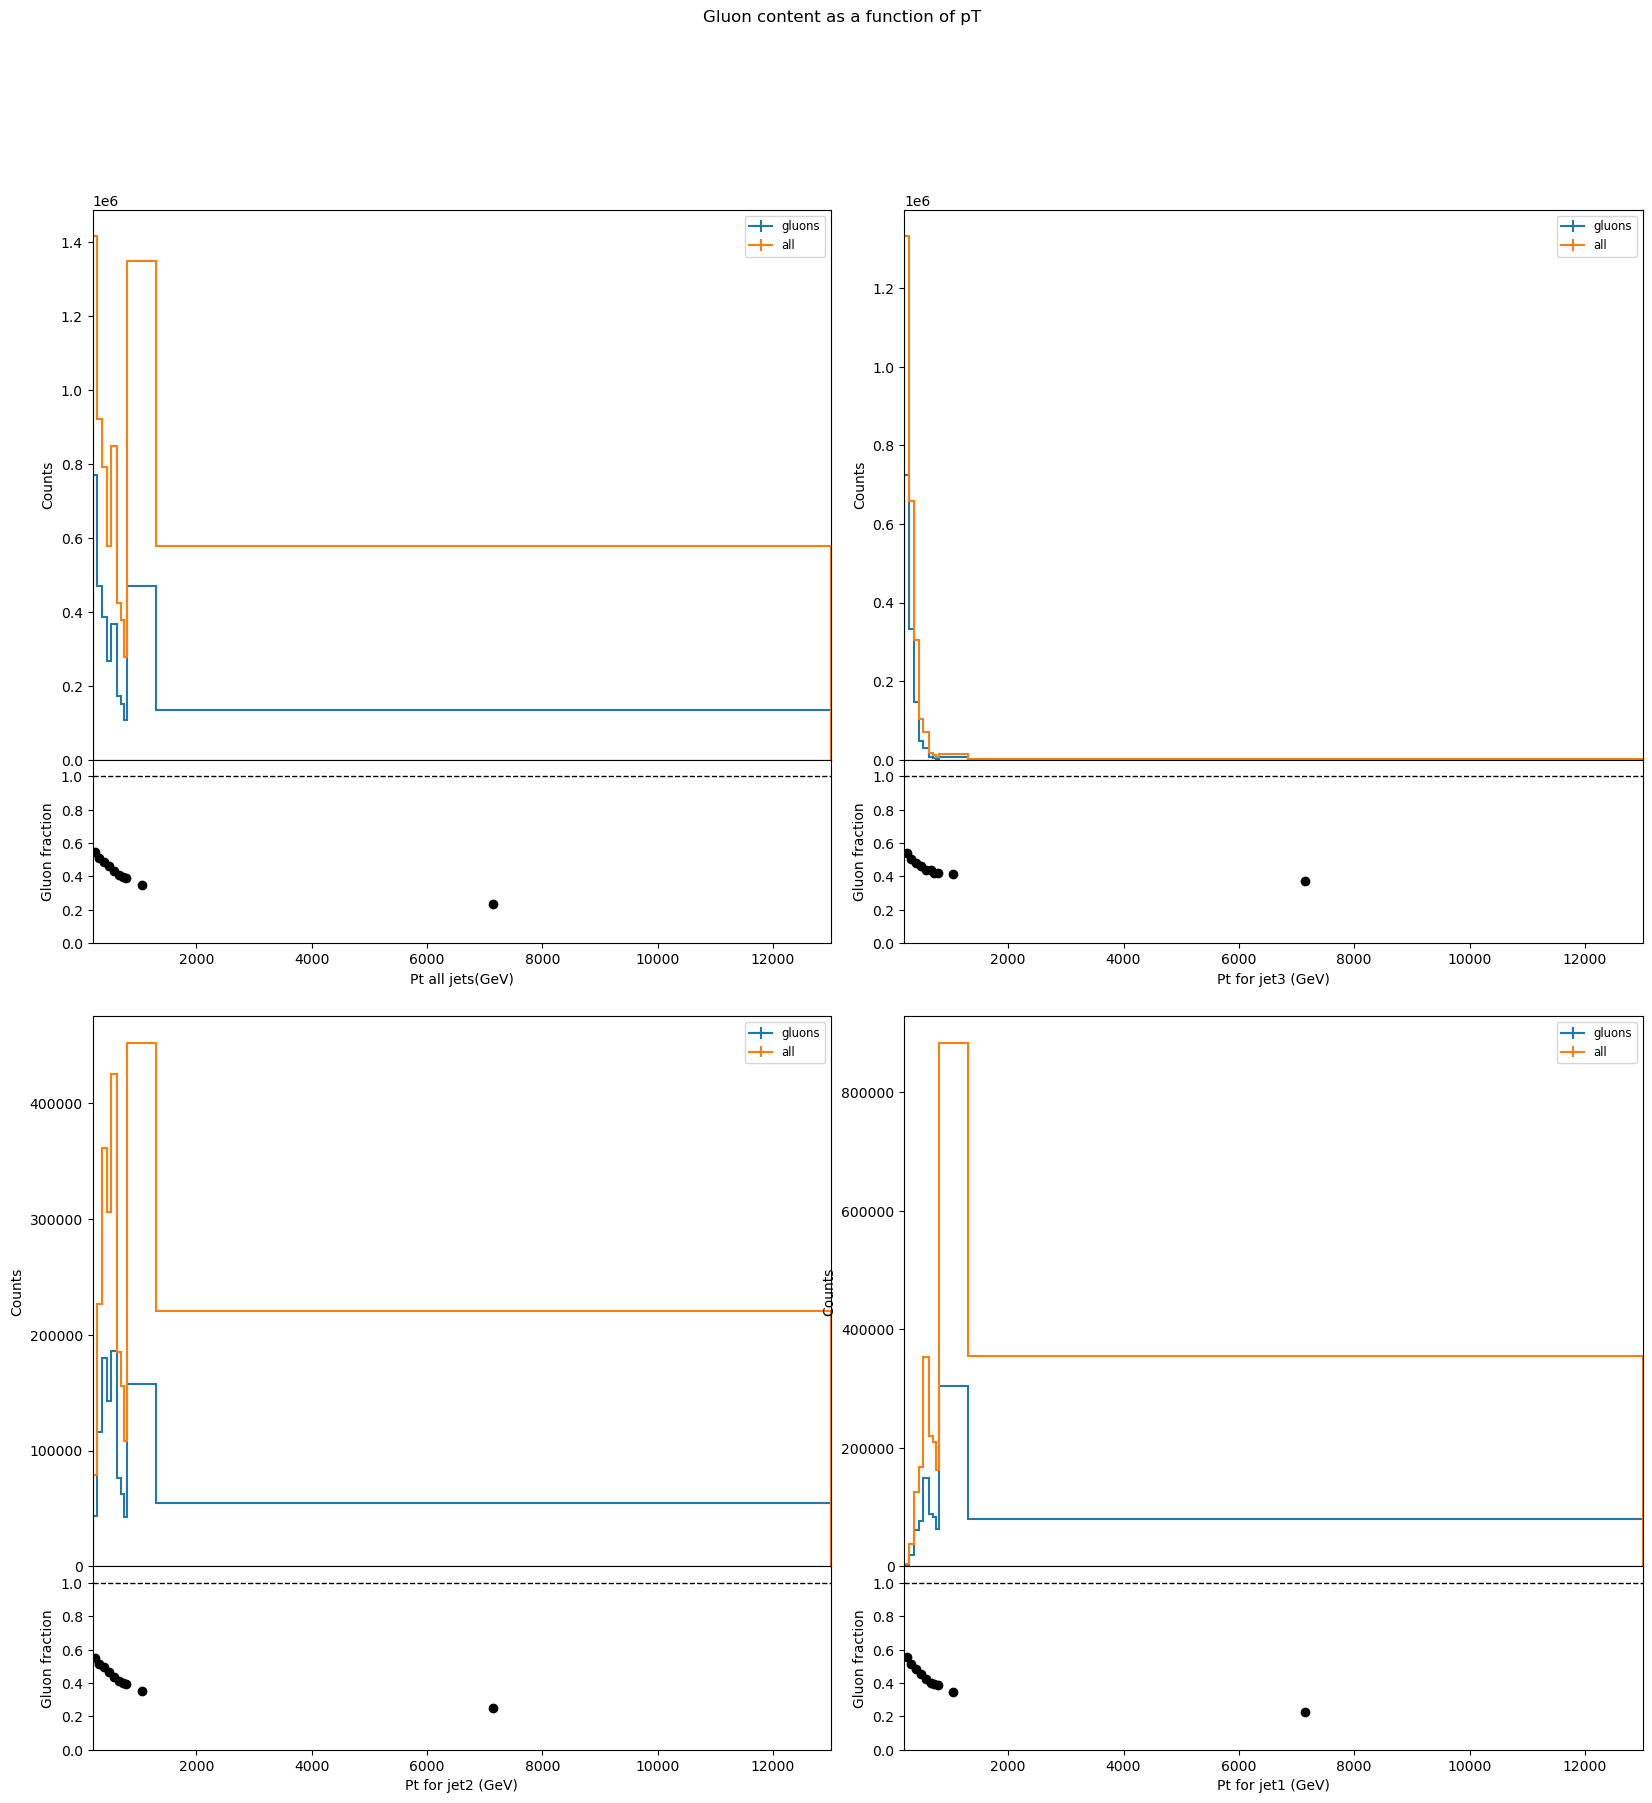

In [35]:
print(result.keys())
print([ax.name for ax in result['alljet_ptreco_mreco'].axes])

plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
grid = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
grid00 = grid[0,0].subgridspec(4,1, wspace=0, hspace=0)
grid01 = grid[0,1].subgridspec(4,1, wspace=0, hspace=0)
grid10 = grid[1,0].subgridspec(4,1, wspace=0, hspace=0)
grid11 = grid[1,1].subgridspec(4,1, wspace=0, hspace=0)
        
numerator = result['alljet_ptreco_mreco'][{'partonFlav':'Gluon'}].project('ptreco')
denominator = result['alljet_ptreco_mreco'].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid00[:-1, :])
subplot_ax = fig.add_subplot(grid00[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt all jets(GeV)")
plt.ylabel("Gluon fraction")

numerator = result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco')
denominator = result['alljet_ptreco_mreco'][{'jetNumb':'jet3'}].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid01[:-1, :])
subplot_ax = fig.add_subplot(grid01[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet3 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet2'}].project('ptreco')
denominator = result['alljet_ptreco_mreco'][{'jetNumb':'jet2'}].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid10[:-1, :])
subplot_ax = fig.add_subplot(grid10[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet2 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet1'}].project('ptreco')
denominator = result['alljet_ptreco_mreco'][{'jetNumb':'jet1'}].project('ptreco')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid11[:-1, :])
subplot_ax = fig.add_subplot(grid11[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Pt for jet1 (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of pT')
plt.savefig(os_path + "gluonPtFrac.png")

[133249. 129206. 128602. 124151. 119469. 114232. 107017.  99794.  92235.
  84404.  77418.  68148.  60275.  55402.  49320.  44091.  36593.  28741.
  23624.  19150.  15371.  12232.  10007.   7450.   5494.] [273112. 266926. 267051. 258465. 251060. 244458. 232524. 222355. 209263.
 194981. 182454. 165439. 148718. 140471. 126468. 120001. 100892.  82988.
  70140.  58480.  47911.  40153.  32583.  25425.  18962.]
[43927. 43412. 43237. 41460. 41330. 40830. 37821. 36940. 35174. 32721.
 30748. 28525. 26860. 25959. 24632. 22508. 19194. 15921. 13294. 11162.
  9655.  7931.  7220.  5512.  4051.] [77707. 77099. 76879. 74578. 73699. 72824. 69437. 67602. 65479. 62028.
 58991. 55629. 53328. 53094. 49460. 47920. 41541. 36029. 30245. 26844.
 23549. 20782. 18483. 15339. 11797.]
[46148. 44405. 44317. 42911. 40680. 37785. 36322. 32830. 29792. 27781.
 25125. 21817. 18901. 16732. 14089. 12466.  9863.  7672.  6261.  4993.
  3674.  2799.  1839.  1289.  1061.] [95427. 93038. 93046. 90073. 86439. 83529. 79508. 75811

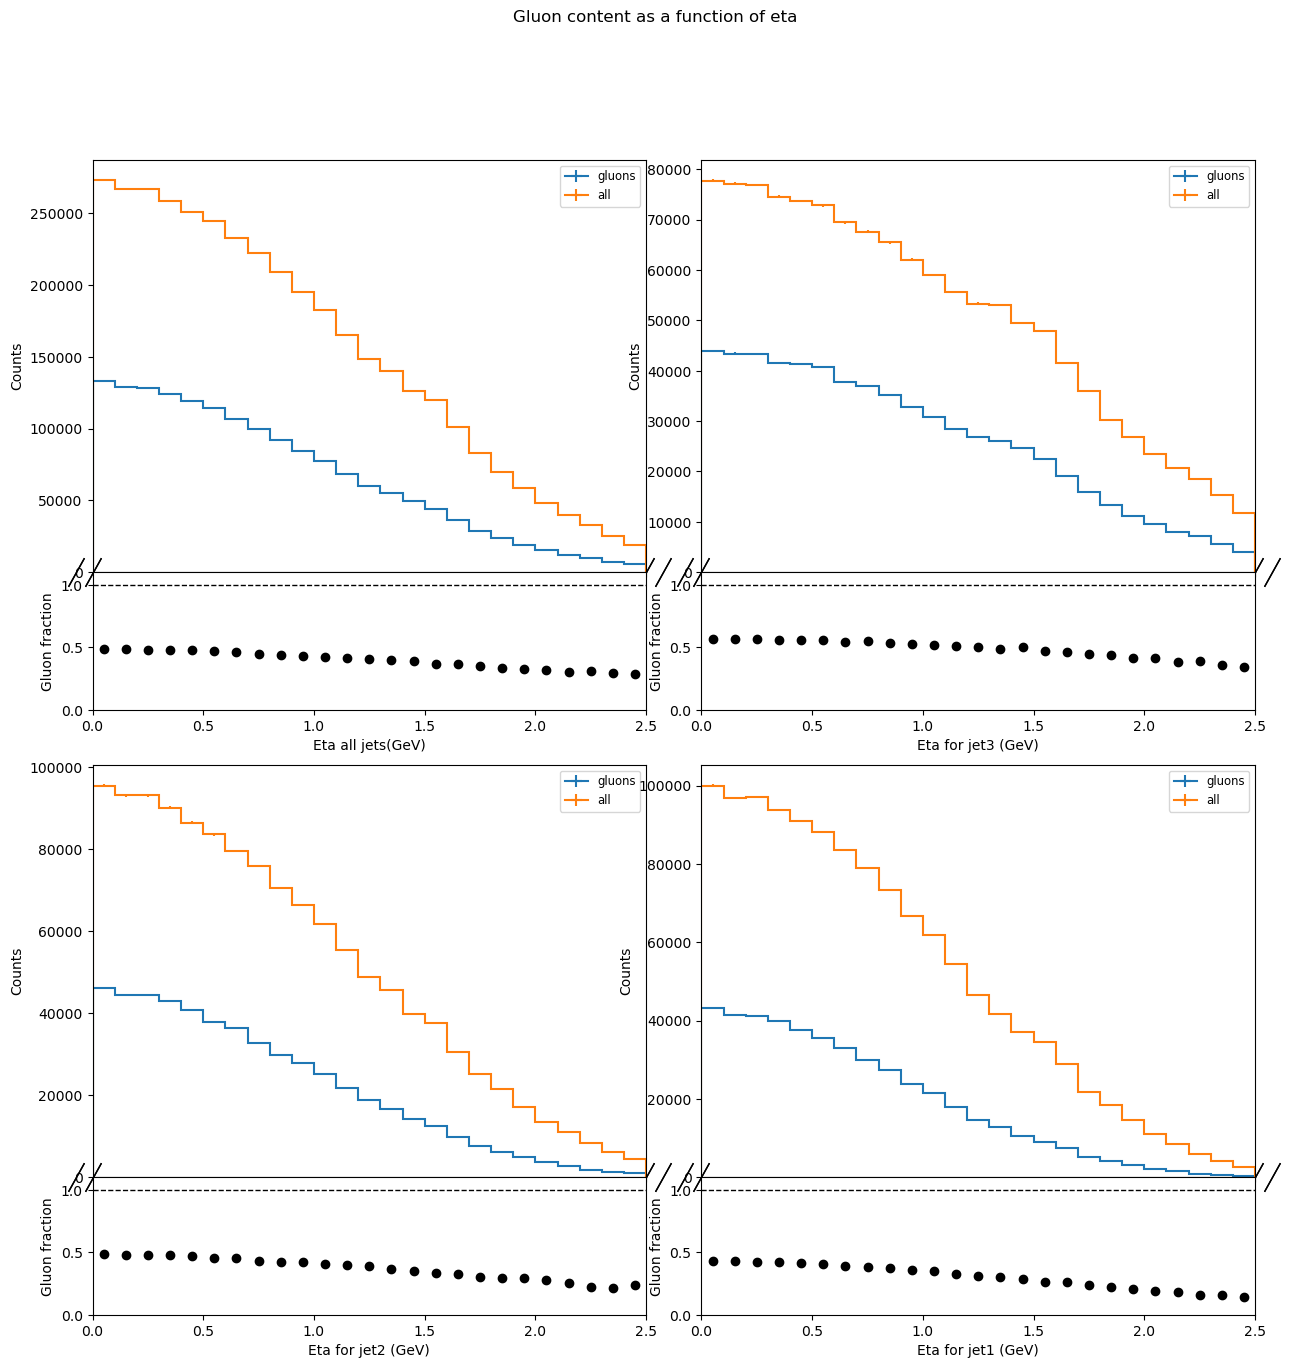

In [36]:
plt.rcParams["figure.figsize"] = (15,15)
fig = plt.gcf()
grid = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
grid00 = grid[0,0].subgridspec(4,1, wspace=0, hspace=0)
grid01 = grid[0,1].subgridspec(4,1, wspace=0, hspace=0)
grid10 = grid[1,0].subgridspec(4,1, wspace=0, hspace=0)
grid11 = grid[1,1].subgridspec(4,1, wspace=0, hspace=0)

numerator = result['btag_eta'][{'partonFlav':'Gluon'}].project('eta')
denominator = result['btag_eta'].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid00[:-1, :])
subplot_ax = fig.add_subplot(grid00[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta all jets(GeV)")
plt.ylabel("Gluon fraction")

numerator = result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta')
denominator = result['btag_eta'][{'jetNumb':'jet3'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid01[:-1, :])
subplot_ax = fig.add_subplot(grid01[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet3 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet2'}].project('eta')
denominator = result['btag_eta'][{'jetNumb':'jet2'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid10[:-1, :])
subplot_ax = fig.add_subplot(grid10[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet2 (GeV)")
plt.ylabel("Gluon fraction")


numerator = result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet1'}].project('eta')
denominator = result['btag_eta'][{'jetNumb':'jet1'}].project('eta')
print(numerator.values(), denominator.values())

numerator.label = r'$\epsilon$'

main_ax = fig.add_subplot(grid11[:-1, :])
subplot_ax = fig.add_subplot(grid11[-1, :], sharex=main_ax)
plt.setp(main_ax.get_xticklabels(), visible=False)
main_ax, sublot_ax = numerator.plot_ratio(
    denominator,
    rp_num_label="gluons",
    rp_denom_label="all",
    rp_uncert_draw_type="line",
    rp_uncertainty_type="efficiency",
    ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
)

plt.xlabel("Eta for jet1 (GeV)")
plt.ylabel("Gluon fraction")
fig.suptitle('Gluon content as a function of eta')
plt.savefig(os_path+'/gluonEtaFrac' + ".png")

['dataset', 'jetNumb', 'partonFlav', 'frac', 'eta']
[<Axes: xlabel='m_{RECO} (GeV)'> <Axes: xlabel='p_{T,RECO} (GeV)'>
 <Axes: xlabel='Jet eta (GeV)'>]


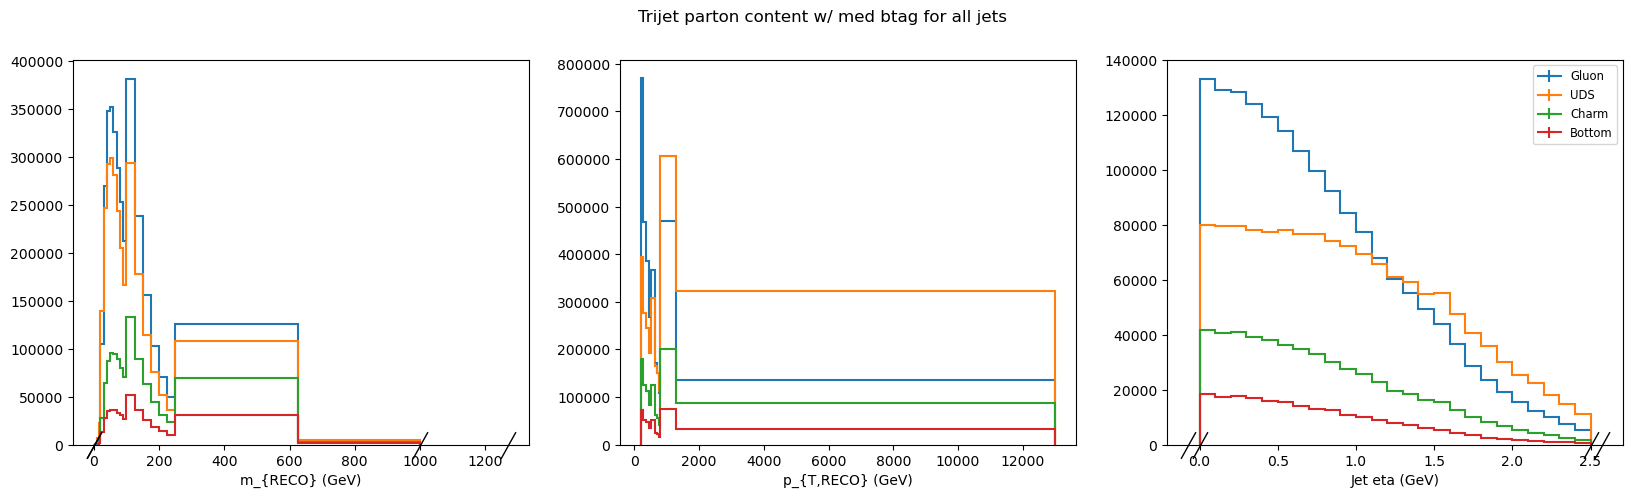

In [37]:
#sum entries in bins --> plot as y-axis
plt.rcParams["figure.figsize"] = (20,5)
print([ax.name for ax in result['btag_eta'].axes])

fig, axs = plt.subplots(1, 3)
result['alljet_ptreco_mreco'][{'jetNumb':sum, 'dataset':sum, 'ptreco':sum}].plot1d(ax = axs[0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.xlabel("Jet mass (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':sum, 'dataset':sum, 'mreco':sum}].plot1d(ax = axs[1], overlay='partonFlav')
plt.rc('legend',fontsize='small')
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet pT (GeV)")
result['btag_eta'][{'jetNumb':sum, 'dataset':sum, 'frac':sum}].plot1d(ax = axs[2], overlay='partonFlav')
plt.rc('legend',fontsize='small')
plt.legend()
plt.xlabel("Jet eta (GeV)")

print(axs)

fig.suptitle('Trijet parton content w/ med btag for all jets', fontsize="large")
plt.savefig(os_path+'/allJetPtEtaPhi_partons' + ".png")

[[<Axes: xlabel='Jet1 mass (GeV)'> <Axes: xlabel='Jet1 pT (GeV)'>
  <Axes: xlabel='Jet1 eta (GeV)'>]
 [<Axes: xlabel='Jet2 mass (GeV)'> <Axes: xlabel='Jet2 pT (GeV)'>
  <Axes: xlabel='Jet2 eta (GeV)'>]
 [<Axes: xlabel='Jet3 mass (GeV)'> <Axes: xlabel='Jet3 pT (GeV)'>
  <Axes: xlabel='Jet3 eta (GeV)'>]]


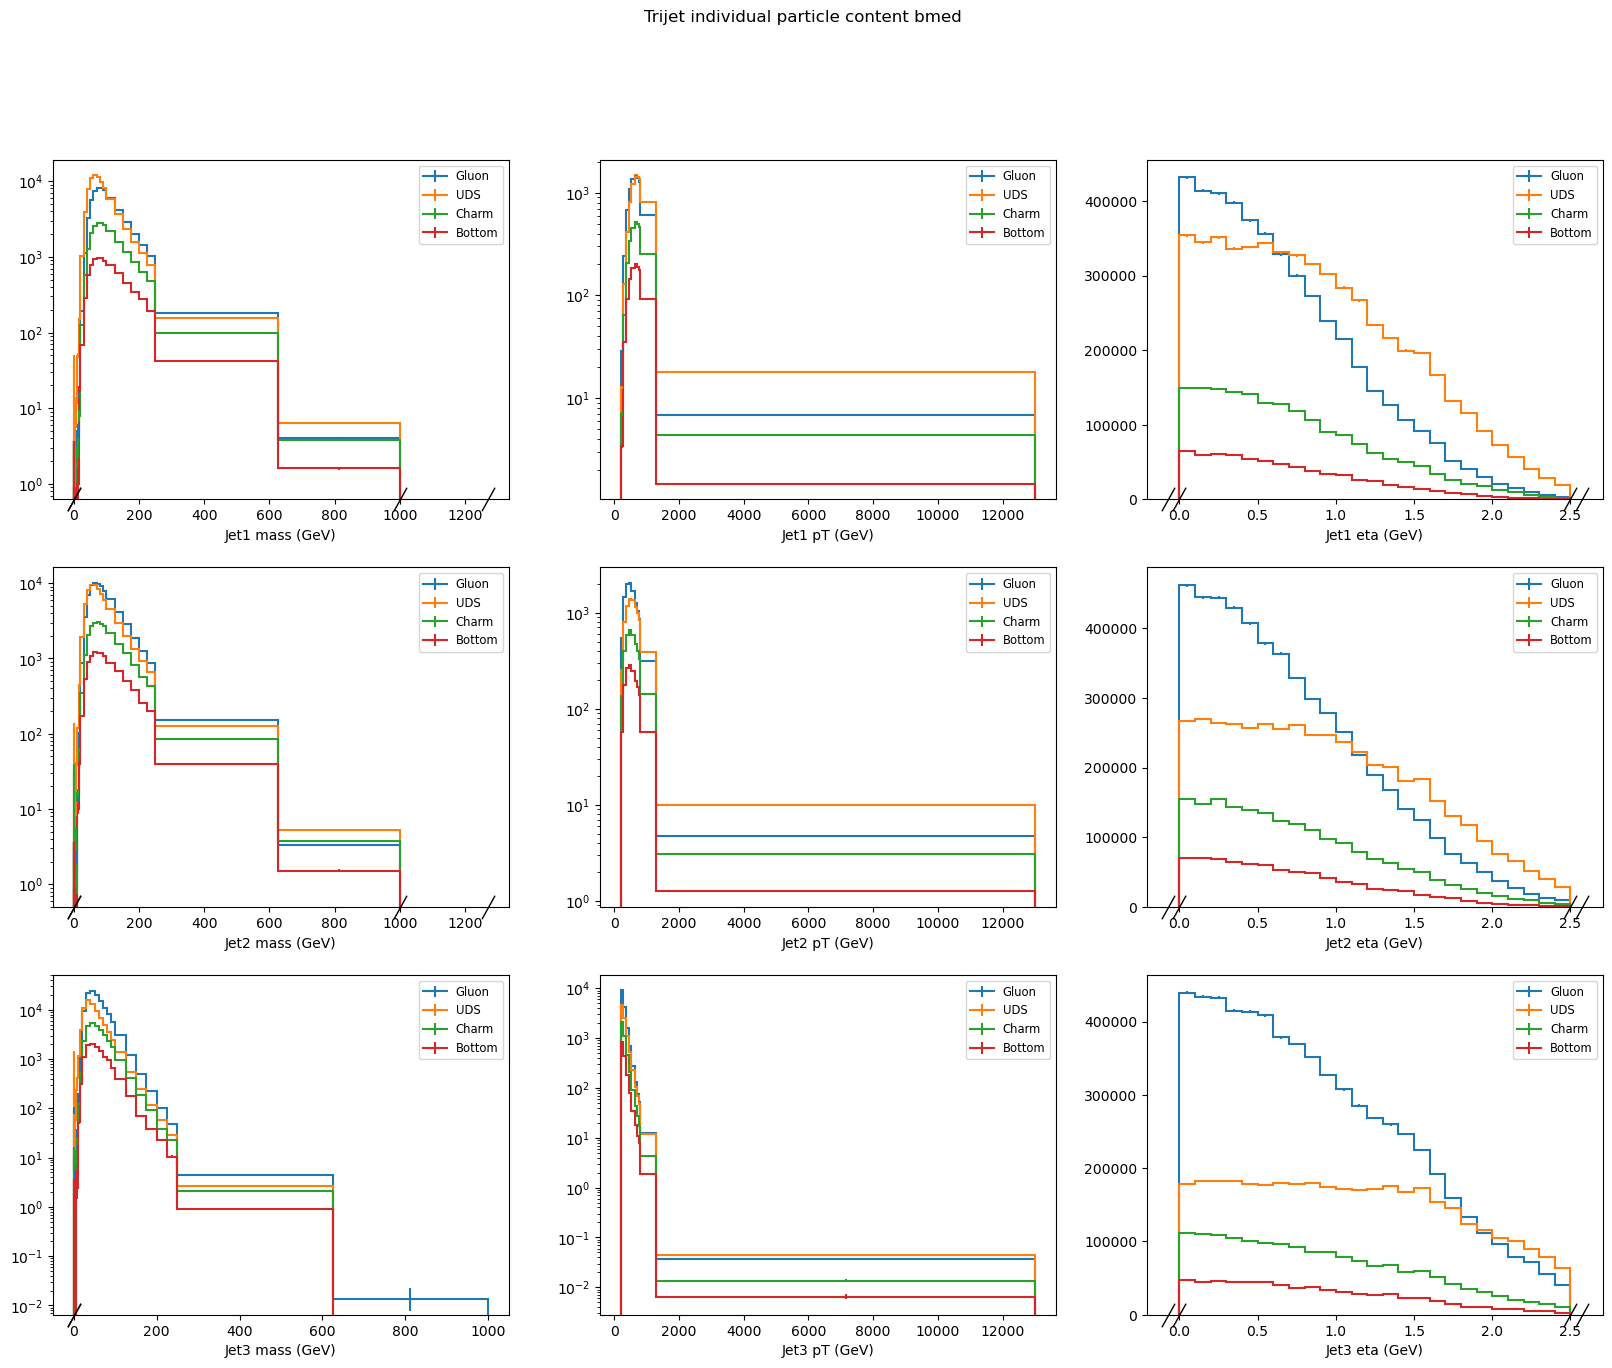

In [38]:
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
result['alljet_ptreco_mreco'][{'jetNumb':'jet1', 'dataset':sum, 'ptreco':sum}].plot1d(ax = axs[0,0], overlay='partonFlav', binwnorm=True)
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':'jet1', 'dataset':sum, 'mreco':sum}].plot1d(ax = axs[0,1], overlay='partonFlav', binwnorm=True)
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['btag_eta'][{'jetNumb':'jet1', 'dataset':sum, 'frac':sum}].plot1d(ax = axs[0,2], overlay='partonFlav', binwnorm=True)
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':'jet2', 'dataset':sum,'ptreco':sum}].plot1d(ax = axs[1,0], overlay='partonFlav', binwnorm=True)
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':'jet2', 'dataset':sum,'mreco':sum}].plot1d(ax = axs[1,1], overlay='partonFlav', binwnorm=True)
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['btag_eta'][{'jetNumb':'jet2', 'dataset':sum,'frac':sum}].plot1d(ax = axs[1,2], overlay='partonFlav', binwnorm=True)
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':'jet3', 'dataset':sum,'ptreco':sum}].plot1d(ax = axs[2,0], overlay='partonFlav', binwnorm=True)
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['alljet_ptreco_mreco'][{'jetNumb':'jet3', 'dataset':sum,'mreco':sum}].plot1d(ax = axs[2,1], overlay='partonFlav', binwnorm=True)
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['btag_eta'][{'jetNumb':'jet3', 'dataset':sum,'frac':sum}].plot1d(ax = axs[2,2], overlay='partonFlav', binwnorm=True)
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
for i,ax in enumerate(axs.flatten()):
    if (i+1)%3!=0: 
        ax.set_yscale('log')
fig.suptitle('Trijet individual particle content bmed', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")

Hist(
  StrCategory(['Gluon', 'UDS', 'Charm', 'Bottom'], growth=True, name='partonFlav', label='Parton Flavour'),
  Variable(array([0.00e+00, 5.00e-01, 1.00e+00, 3.00e+00, 5.00e+00, 7.50e+00,
       1.00e+01, 1.50e+01, 2.00e+01, 3.00e+01, 4.00e+01, 5.00e+01,
       6.00e+01, 7.00e+01, 8.00e+01, 9.00e+01, 1.00e+02, 1.25e+02,
       1.50e+02, 1.75e+02, 2.00e+02, 2.25e+02, 2.50e+02, 6.25e+02,
       1.00e+03]), name='mreco', label='m_{RECO} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=7.56208e+06, variance=7.56208e+06) (WeightedSum(value=7.56349e+06, variance=7.56349e+06) with flow)


Text(0.5, 0, 'Jet mass (GeV)')

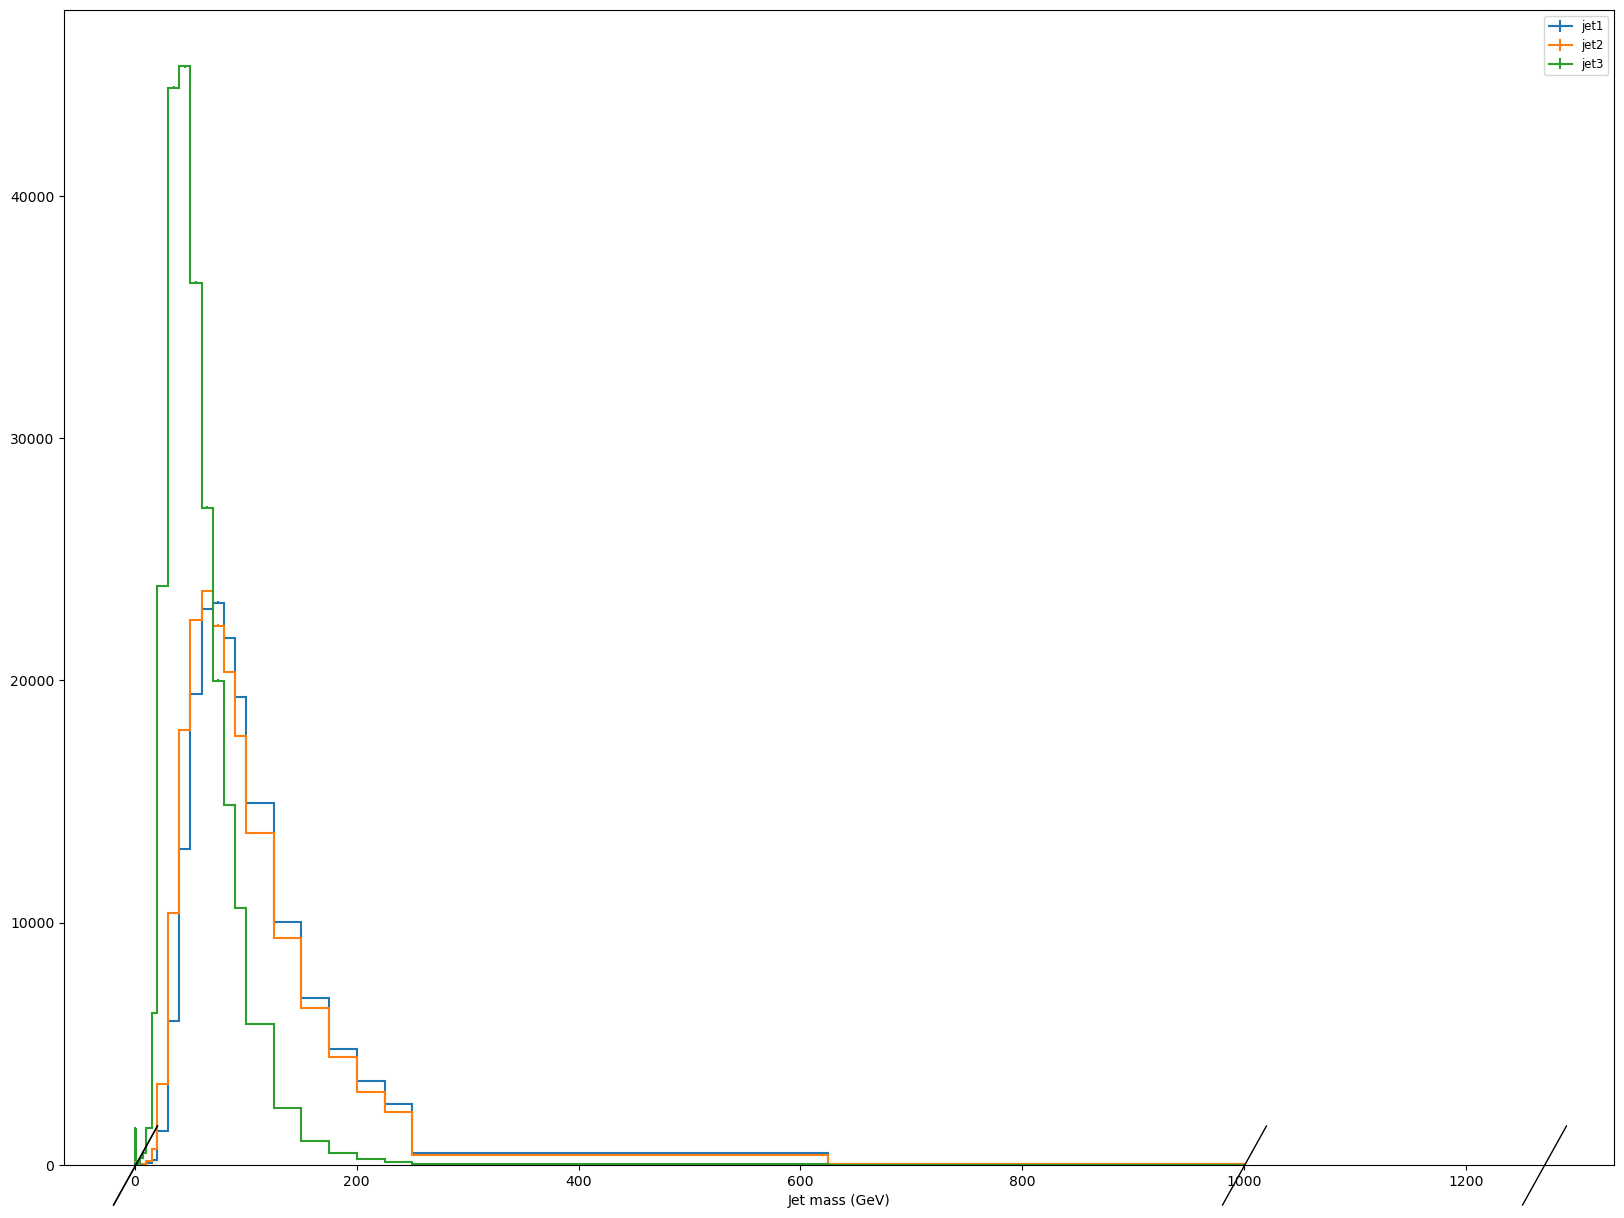

In [39]:
# plt.rcParams["figure.figsize"] = (20,5)


# fig, axs = plt.subplots(1, 3)
print(result['alljet_ptreco_mreco'][{'jetNumb':sum, 'dataset':sum, 'ptreco':sum}])
result['alljet_ptreco_mreco'][{'dataset':sum, "partonFlav":sum, 'ptreco':sum}].plot1d(binwnorm=True, overlay='jetNumb')
plt.legend()
#axs[0].set_xlabel("Jet mass (GeV)")
plt.xlabel("Jet mass (GeV)")

In [40]:
# plot mass after summing over partons

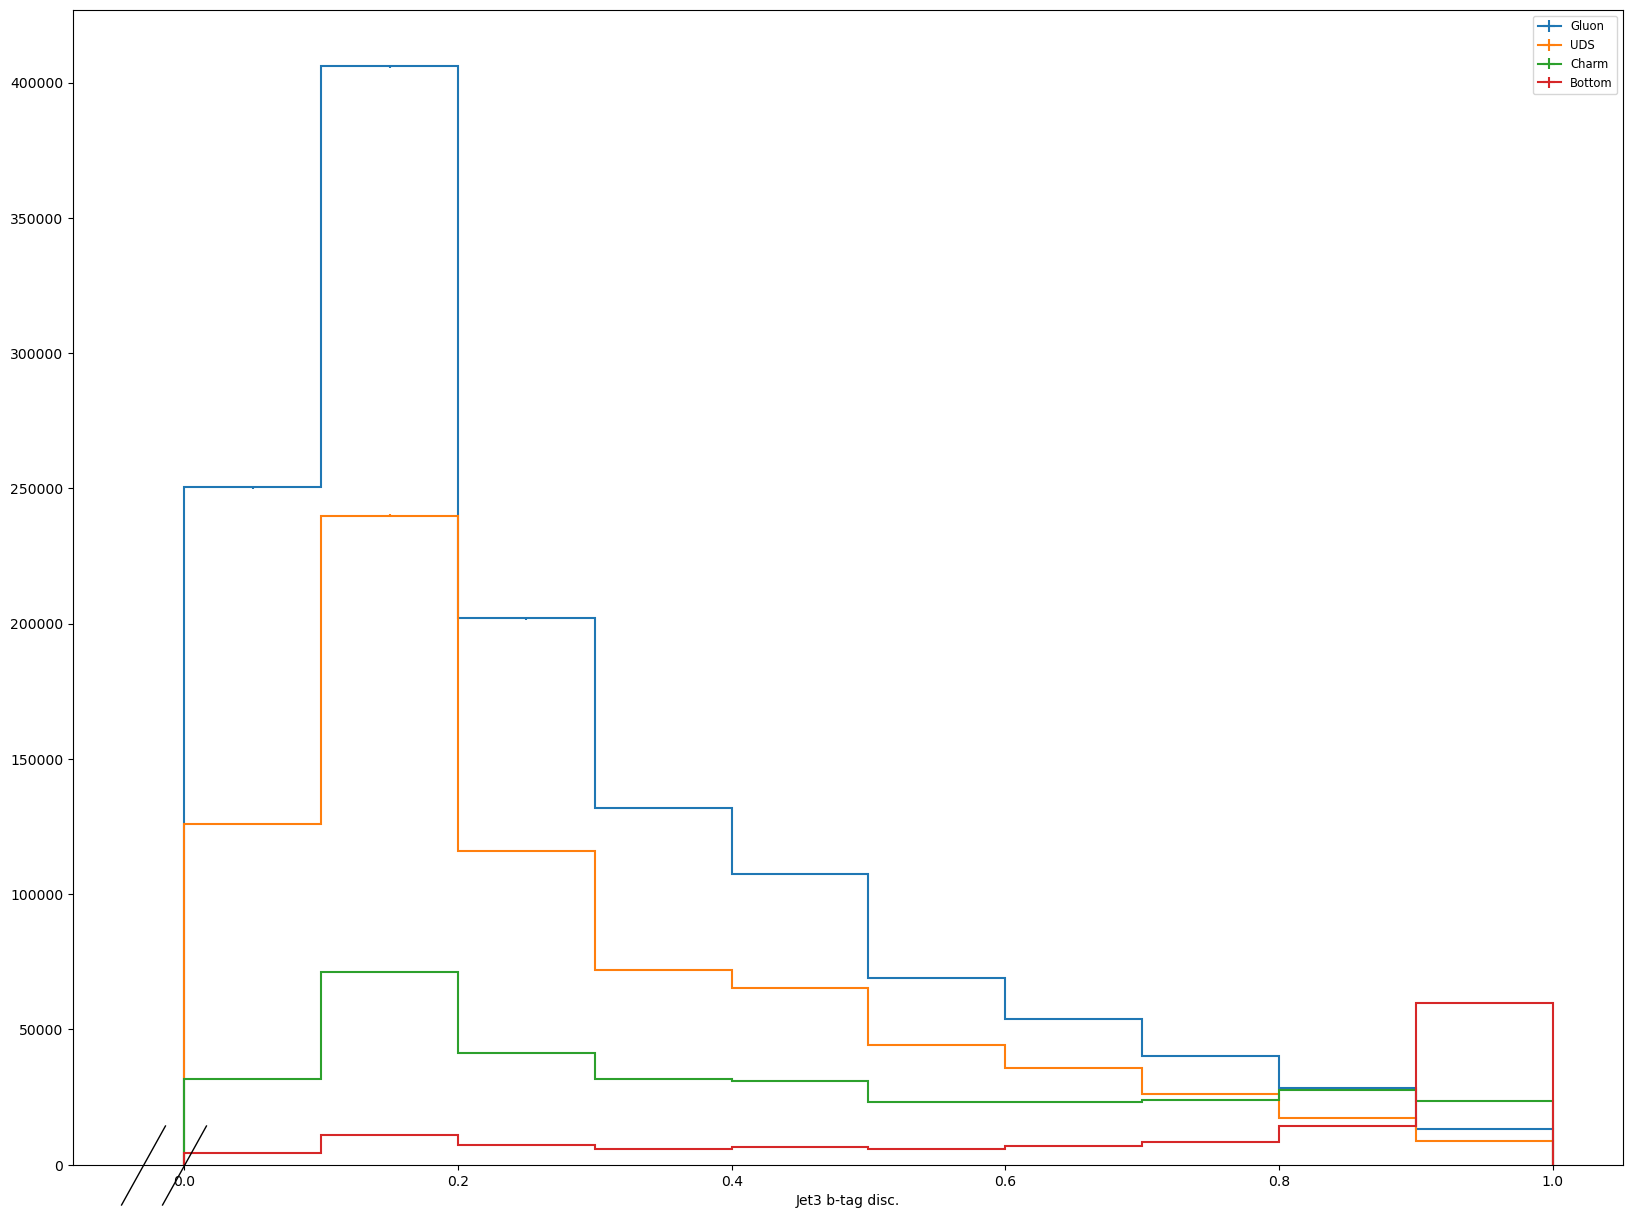

In [41]:
fig, ax = plt.subplots(1, 1)
result['btag_eta'][{'jetNumb':'jet3', 'dataset':sum, 'eta':sum}].plot1d(overlay="partonFlav")
ax.set_xlabel("Jet3 b-tag disc.")
plt.legend()
#can do an anti b-tag --> inverse of recommendation

In [42]:
njets=result['cutflow']['n3Jets']
ngluonjets=result['cutflow']['nGluonJets']
print(result['cutflow'])
print("Gluon purity:", ngluonjets/njets)

defaultdict_accumulator(<class 'int'>, {'nEvents initial': 808475899, 'nEvents2016/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM': 19593944, 'misses': 392539745, 'nGluonJets': 1303739, 'n3Jets': 2521162, 'nEvents final selection': 2521162, 'chunks': 8260, 'nEvents2018/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM': 19664000, 'nEvents2017/QCD_Pt_1000to1400_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM': 19262750, 'nEvents2018/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL18NanoAODv9-106X_upgrade2018_realistic_v16_L1v1-v1/NANOAODSIM': 10780538, 'nEvents2017/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL17NanoAODv9-106X_mc2017_realistic_v9-v1/NANOAODSIM': 9360000, 'nEvents2016/QCD_Pt_1400to1800_TuneCP5_13TeV_pythia8/RunIISummer20UL16NanoAODv9-106X_mcRun2_asymptotic_v17-v1/NANOAODSIM': 10668000, 'nEv

#plot pt, eta, phi, fake rate, pt efficiency, gluon purity for difference selections with b tags for all jets 
#and each individual jet in the 3 jets